# Problem Statement

ResaleLeiLong is a HDB resale social network that offers a price estimator and feature recommendation service for housing agents.

Agents need to know what is a reasonable price to recommend to buyers and sellers and they also need to know what features will affect to price when communicating with their clients.

# Introduction

Housing agents have many avenues to advertise to resale flat buyers. In the past, agents will often publish advertisments on newspapers so they have to be careful with what features they use to advertise and what price they should put up as the newspapers charge per letter.

Now, the problem is too much information, what do agents put up in PropertyGuru or 99.co for maximum impact for their advertisments?

We will generate several models to help these agents decide.

# Cleaning and EDA (1 Dimension Exploration)

We'll first read the dictionary and group the information to explore with a bit more depth.

Price information: `resale_price`

Date information: `Tranc_YearMonth`(year and month of the resale transaction), `Tranc_Year`,`Tranc_Month`, `lease_commence_date`, `year_completed`

Location information: `town`,`block`, `street_name`,`address`(block + street_name), `postal`, `Latitude`, `Longitude`, `planning_area`

Flat information: `flat_type`,`flat_model`,  `full_flat_type` (flat type + model), `floor_area_sqm`,`floor_area_sqft`,`storey_range`, `mid_storey`(median value of storey_range), `lower`, `upper`,`mid` (lower, upper and middle value of storey_range respectively), 

Block information: `total_dwelling_units`, `max_floor_lvl`,`hdb_age`, `1room_sold`, `2room_sold`,`3room_sold`,`4room_sold`,`5room_sold`,`exec_sold`, `multigen_sold`,`studio_apartment_sold`,`1room_rental`, `2room_rental`,`3room_rental`,`other_room_rental`, `residential`,`commercial`,`market_hawker`,`multistorey_carpark`,`precinct_pavilion`

Amenities information:
- Mall: `Mall_Nearest_Distance`, `Mall_Within_500m`, `Mall_Within_1km`, `Mall_Within_2km`

- Hawker Centre: `Hawker_Nearest_Distance`, `Hawker_Within_500m`, `Hawker_Within_1km`, `Hawker_Within_2km`, `hawker_food_stalls`, `hawker_market_stalls`

- Transport: `mrt_nearest_distance`, `mrt_name`, `bus_interchange`, `mrt_interchange`, `mrt_latitude`, `mrt_longitude`, `bus_stop_nearest_distance`, `bus_stop_name`, `bus_stop_latitude`, `bus_stop_longitude`

School information: `pri_sch_nearest_distance`, `pri_sch_name`,`vacancy`, `pri_sch_affiliation`,`pri_sch_latitude`,`pri_sch_longitude`, `sec_sch_nearest_dist`, `sec_sch_name`, `cutoff_point`, `affiliation`, `sec_sch_latitude`, `sec_sch_longitude`

## Imports and Cleaning

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/train.csv')

C:\Users\hammi\AppData\Local\Temp\ipykernel_16236\1458987293.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../datasets/train.csv')


In [3]:
df.columns[42]

'postal'

Since the postal code is a number at provides non-numerical data like location and block, we will type cast the postal code as strings

In [4]:
df['postal'] = df['postal'].astype('str')

Peek at the data.

In [5]:
pd.set_option('display.max_columns',78)
df.head()

id Tranc_YearMonth             town  flat_type block       street_name  \
0   88471         2016-05  KALLANG/WHAMPOA     4 ROOM    3B  UPP BOON KENG RD   
1  122598         2012-07           BISHAN     5 ROOM   153      BISHAN ST 13   
2  170897         2013-07      BUKIT BATOK  EXECUTIVE  289B    BT BATOK ST 25   
3   86070         2012-04           BISHAN     4 ROOM   232      BISHAN ST 22   
4  153632         2017-12           YISHUN     4 ROOM   876      YISHUN ST 81   

  storey_range  floor_area_sqm  flat_model  lease_commence_date  resale_price  \
0     10 TO 12            90.0     Model A                 2006      680000.0   
1     07 TO 09           130.0    Improved                 1987      665000.0   
2     13 TO 15           144.0   Apartment                 1997      838000.0   
3     01 TO 05           103.0     Model A                 1992      550000.0   
4     01 TO 03            83.0  Simplified                 1987      298000.0   

   Tranc_Year  Tranc_Month  mid_storey  lower  upper  mid  \
0        2016            5          11     10     12   11   
1        2012            7           8      7      9    8   
2        2013            7          14     13     15   14   
3        2012            4           3      1      5    3   
4        2017           12           2      1      3    2   

        full_flat_type               address  floor_area_sqft  price_per_sqft  \
0       4 ROOM Model A  3B, UPP BOON KENG RD          968.760      701.928238   
1      5 ROOM Improved     153, BISHAN ST 13         1399.320      475.230826   
2  EXECUTIVE Apartment  289B, BT BATOK ST 25         1550.016      540.639580   
3       4 ROOM Model A     232, BISHAN ST 22         1108.692      496.080066   
4    4 ROOM Simplified     876, YISHUN ST 81          893.412      333.552717   

   hdb_age  max_floor_lvl  year_completed residential commercial  \
0       15             25            2005           Y          N   
1       34              9            1987           Y          N   
2       24             16            1996           Y          N   
3       29             11            1990           Y          Y   
4       34              4            1987           Y          N   

  market_hawker multistorey_carpark precinct_pavilion  total_dwelling_units  \
0             N                   N                 N                   142   
1             N                   N                 N                   112   
2             N                   N                 N                    90   
3             N                   N                 N                    75   
4             N                   N                 N                    48   

   1room_sold  2room_sold  3room_sold  4room_sold  5room_sold  exec_sold  \
0           0           0           0          96          46          0   
1           0           0           0          56          56          0   
2           0           0           0           0          30         60   
3           0           0           0          68           7          0   
4           0           0           0          30          18          0   

   multigen_sold  studio_apartment_sold  1room_rental  2room_rental  \
0              0                      0             0             0   
1              0                      0             0             0   
2              0                      0             0             0   
3              0                      0             0             0   
4              0                      0             0             0   

   3room_rental  other_room_rental  postal  Latitude   Longitude  \
0             0                  0  382003  1.314299  103.872828   
1             0                  0  570153  1.346086  103.855078   
2             0                  0  651289  1.343867  103.760535   
3             0                  0  570232  1.358245  103.845504   
4             0                  0  760876  1.414745  103.835532   

  

In [6]:
df.shape

(150634, 78)

That's a lot of rows.

Check dtypes.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

We'll convert date information to datetime. `Tranc_YearMonth`, `Tranc_Year`, `Tranc_Month`, `lease_commence_date`, `year_completed`

Check formats

In [8]:
df[['Tranc_YearMonth','Tranc_Year','Tranc_Month','lease_commence_date','year_completed']].head()

Tranc_YearMonth  Tranc_Year  Tranc_Month  lease_commence_date  \
0         2016-05        2016            5                 2006   
1         2012-07        2012            7                 1987   
2         2013-07        2013            7                 1997   
3         2012-04        2012            4                 1992   
4         2017-12        2017           12                 1987   

   year_completed  
0            2005  
1            1987  
2            1996  
3            1990  
4            1987

In [9]:
df['Tranc_YearMonth'] = pd.to_datetime(df['Tranc_YearMonth'], format='%Y-%m')
df['Tranc_Year'] = pd.to_datetime(df['Tranc_Year'], format='%Y')
df['Tranc_Month'] = pd.to_datetime(df['Tranc_Month'], format='%m')
df['lease_commence_date'] = pd.to_datetime(df['lease_commence_date'], format='%Y')
df['year_completed'] = pd.to_datetime(df['year_completed'], format='%Y')

Check conversions

In [10]:
df['Tranc_YearMonth'].head()

0   2016-05-01
1   2012-07-01
2   2013-07-01
3   2012-04-01
4   2017-12-01
Name: Tranc_YearMonth, dtype: datetime64[ns]

In [11]:
df['Tranc_Year'].head()

0   2016-01-01
1   2012-01-01
2   2013-01-01
3   2012-01-01
4   2017-01-01
Name: Tranc_Year, dtype: datetime64[ns]

In [12]:
df['Tranc_Month'].head()

0   1900-05-01
1   1900-07-01
2   1900-07-01
3   1900-04-01
4   1900-12-01
Name: Tranc_Month, dtype: datetime64[ns]

Since our dataset doesn't stretch to 1900, we'll use it as a placeholder in case we want to examine sale prices wrt month.

In [13]:
df['lease_commence_date'].head()

0   2006-01-01
1   1987-01-01
2   1997-01-01
3   1992-01-01
4   1987-01-01
Name: lease_commence_date, dtype: datetime64[ns]

In [14]:
df['year_completed'].head()

0   2005-01-01
1   1987-01-01
2   1996-01-01
3   1990-01-01
4   1987-01-01
Name: year_completed, dtype: datetime64[ns]

`residential`,`commercial`,`market_hawker`,`multistorey_carpark`,`precinct_pavilion` can be converted to boolean for easier analysis.

In [15]:
bool_list = ['residential','commercial','market_hawker','multistorey_carpark','precinct_pavilion']

df[bool_list] = df[bool_list].replace('Y',1)
df[bool_list] = df[bool_list].replace('N',0)

In [16]:
df[bool_list].head()

residential  commercial  market_hawker  multistorey_carpark  \
0            1           0              0                    0   
1            1           0              0                    0   
2            1           0              0                    0   
3            1           1              0                    0   
4            1           0              0                    0   

   precinct_pavilion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0

Check for null values

In [17]:
df.isnull().sum().sort_values(ascending=False).head(10)

Hawker_Within_500m         97390
Mall_Within_500m           92789
Hawker_Within_1km          60868
Hawker_Within_2km          29202
Mall_Within_1km            25426
Mall_Within_2km             1940
Mall_Nearest_Distance        829
Hawker_Nearest_Distance        0
mrt_nearest_distance           0
hawker_market_stalls           0
dtype: int64

Let's clean the data from the smallest number of null values. Specifically looking at the mall within the distances.

In [18]:
df[df['Mall_Nearest_Distance'].isnull()][['Mall_Within_500m','Mall_Within_1km','Mall_Within_2km']]

Mall_Within_500m  Mall_Within_1km  Mall_Within_2km
75                   NaN              NaN              NaN
321                  NaN              NaN              NaN
478                  NaN              NaN              NaN
643                  NaN              NaN              NaN
691                  NaN              NaN              NaN
...                  ...              ...              ...
150296               NaN              NaN              NaN
150388               NaN              NaN              NaN
150394               NaN              NaN              NaN
150479               NaN              NaN              NaN
150625               NaN              NaN              NaN

[829 rows x 3 columns]

We see that we also don't have information on that. Since the number is small relative to the number of rows, we can drop these.

In [19]:
df = df.dropna(subset=['Mall_Nearest_Distance'])
df.shape

(149805, 78)

We see a lot of hawkers and and malls within 2km with null values. They may just mean that there are no hawkers or malls within 2km.

If so, then we should fill the null values with 0.

Let's check them out with respect with the nearest hawker/mall.

In [20]:
df[df['Mall_Nearest_Distance']>1000][['Mall_Nearest_Distance','Mall_Within_500m','Mall_Within_1km','Mall_Within_2km']].head()

Mall_Nearest_Distance  Mall_Within_500m  Mall_Within_1km  Mall_Within_2km
0             1094.090418               NaN              NaN              7.0
2             1459.579948               NaN              NaN              4.0
7             1749.147519               NaN              NaN              3.0
27            1063.974768               NaN              NaN              4.0
35            1211.930580               NaN              NaN              6.0

In [21]:
df[df['Mall_Nearest_Distance']>2000][['Mall_Nearest_Distance','Mall_Within_500m','Mall_Within_1km','Mall_Within_2km']].head()

Mall_Nearest_Distance  Mall_Within_500m  Mall_Within_1km  Mall_Within_2km
109            2050.201309               NaN              NaN              NaN
220            2247.327448               NaN              NaN              NaN
662            2218.607002               NaN              NaN              NaN
672            2038.439070               NaN              NaN              NaN
798            2115.704584               NaN              NaN              NaN

In [22]:
df[df['Hawker_Nearest_Distance']>1000][['Hawker_Nearest_Distance','Hawker_Within_500m','Hawker_Within_1km','Hawker_Within_2km']].head()

Hawker_Nearest_Distance  Hawker_Within_500m  Hawker_Within_1km  \
2               1762.082341                 NaN                NaN   
4               1540.151439                 NaN                NaN   
8               1032.848455                 NaN                NaN   
9               1743.704293                 NaN                NaN   
10              1634.750527                 NaN                NaN   

    Hawker_Within_2km  
2                 1.0  
4                 1.0  
8                 4.0  
9                 1.0  
10                1.0

In [23]:
df[df['Hawker_Nearest_Distance']>2000][['Hawker_Nearest_Distance','Hawker_Within_500m','Hawker_Within_1km','Hawker_Within_2km']].head()

Hawker_Nearest_Distance  Hawker_Within_500m  Hawker_Within_1km  \
26              2028.864896                 NaN                NaN   
27              2044.044484                 NaN                NaN   
30              3472.690804                 NaN                NaN   
31              2278.363660                 NaN                NaN   
33              3159.026726                 NaN                NaN   

    Hawker_Within_2km  
26                NaN  
27                NaN  
30                NaN  
31                NaN  
33                NaN

We can see that for hawker centres and malls, we can fill our null values with 0.

In [24]:
df = df.fillna(0)

In [25]:
df.isnull().sum().sort_values(ascending=False).head(10)

id                         0
Mall_Within_2km            0
mrt_nearest_distance       0
hawker_market_stalls       0
hawker_food_stalls         0
Hawker_Within_2km          0
Hawker_Within_1km          0
Hawker_Within_500m         0
Hawker_Nearest_Distance    0
Mall_Within_1km            0
dtype: int64

We have cleaned out data so we will proceed with EDA.

## Price Information

In [26]:
df['resale_price'].describe()

count    1.498050e+05
mean     4.486621e+05
std      1.432125e+05
min      1.500000e+05
25%      3.460000e+05
50%      4.200000e+05
75%      5.200000e+05
max      1.258000e+06
Name: resale_price, dtype: float64

To reduce the number of zeros, we will convert the resale prices to hundered thousands.

In [27]:
df['resale_price']=df['resale_price']/100_000

In [28]:
df[['resale_price']].describe()

resale_price
count  149805.000000
mean        4.486621
std         1.432125
min         1.500000
25%         3.460000
50%         4.200000
75%         5.200000
max        12.580000

So the mean transaction price of a HDB flat is about SGD 449,000 with a standard deviation of SGD 143,000.

The highest HDB transaction price is SGD 1.258 million while the lowest is SGD 150,000.

Although the range is large, we might want to keep the outliers to account for special HDB types like maisonettes and terrace houses.

More recently, 5 room flats at certain areas have gone for over a million dollars, so we cannot remove them without considering flat type.

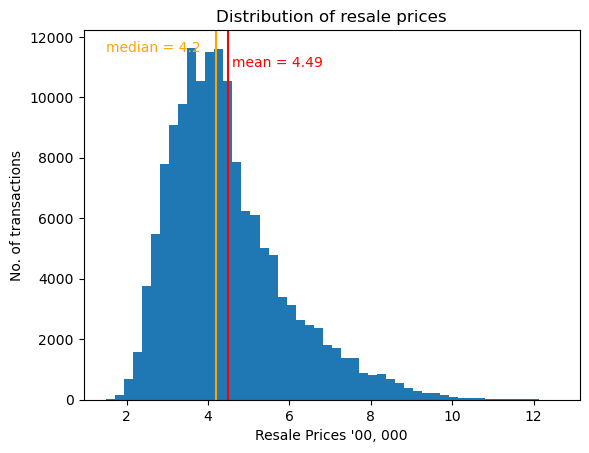

In [29]:
plt.hist(df['resale_price'],bins=50)

plt.title('Distribution of resale prices')
plt.xlabel('Resale Prices \'00, 000')
plt.ylabel('No. of transactions')

plt.axvline(df['resale_price'].mean(), color='red')
plt.axvline(df['resale_price'].median(), color='orange')
plt.text(x=4.6,y=11000,s=f"mean = {round(df['resale_price'].mean(),2)}", color='red')
plt.text(x=1.5,y=11500,s=f"median = {df['resale_price'].median()}", color='orange')
plt.show()

The prices have a log-normal distribution. We may want to consider transform for our model.

## Date Information

In [30]:
df[['Tranc_YearMonth', 'Tranc_Year', 'Tranc_Month', 'lease_commence_date', 'year_completed']].head()

Tranc_YearMonth Tranc_Year Tranc_Month lease_commence_date year_completed
0      2016-05-01 2016-01-01  1900-05-01          2006-01-01     2005-01-01
1      2012-07-01 2012-01-01  1900-07-01          1987-01-01     1987-01-01
2      2013-07-01 2013-01-01  1900-07-01          1997-01-01     1996-01-01
3      2012-04-01 2012-01-01  1900-04-01          1992-01-01     1990-01-01
4      2017-12-01 2017-01-01  1900-12-01          1987-01-01     1987-01-01

Let's look at the distributions of the transaction dates.

In [31]:
df_yearmonth.reset_index().info()

NameError: name 'df_yearmonth' is not defined

In [ ]:
df_yearmonth = df.groupby(['Tranc_YearMonth'])['Tranc_YearMonth'].count().to_frame('count')

df_yearmonth.plot(kind='line')
plt.title('Distribution of Transactions by month and year')
plt.xlabel('Year')
plt.ylabel('No. of transactions')

plt.show()

We can see a drop in transactions in 2020 which can be attributed to the COVID circuit breaker.

Otherwise, we can see that transactions are been increasing in general, with dips for some months in a year.

In [ ]:
df_year = df.groupby(['Tranc_Year'])['Tranc_Year'].count()

df_year.plot(kind='bar')
plt.title('Distribution of Transactions by year')
plt.xlabel('Year')
plt.ylabel('No. of transactions')

plt.hlines(df_year.mean(),xmin=-2,xmax=100, color='orange')
plt.text(1,df_year.mean()-600,f"Mean number of transactions = {df_year.mean():.2f}", color='orange')


plt.show()

We see the number of transctions increasing. Let's check the data from 2021.

In [ ]:
df[df['Tranc_Year'].dt.year == 2021].sort_values(by='Tranc_YearMonth')

We only have data up to April 2021.

In [ ]:
df_month = df.groupby(['Tranc_Month'])['Tranc_Month'].count()

df_month.plot(kind='bar')
plt.title('Distribution of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('No. of transactions')

plt.hlines(df_month.mean(),xmin=-2,xmax=100, color='orange')
plt.text(1,df_month.mean()-600,f"Mean number of transactions = {df_month.mean():.2f}", color='orange')

plt.show()

February may have lower transctions due to Chinese New Year and being a short month.

## Location Information

In [ ]:
df[['town','planning_area']].value_counts().to_frame('counts').sort_values('planning_area')

Most planning areas corresponds to their towns.

We see that some flats are in a particular planning area but a different town.

Let's see where they are on the map.

In [ ]:
def compare_towns(town1,town2):
    sns.scatterplot(data=df[(df['town']==town1)], x='Longitude', y='Latitude', hue='planning_area')
    sns.scatterplot(data=df[(df['town']==town2)], x='Longitude', y='Latitude', hue='planning_area', palette='Accent')
    plt.title(f'Location of HDB flats in {town1} and {town2}')
    plt.show()
    return

In [32]:
duplicates = [('MARINE PARADE', 'BEDOK'), ('KALLANG/WHAMPOA','BUKIT BATOK'), ('QUEENSTOWN','BUKIT TIMAH'), ('CENTRAL AREA','KALLANG/WHAMPOA'), ('SERANGOON','HOUGANG')]

for townpair in duplicates:
    compare_towns(townpair[0],townpair[1])

NameError: name 'compare_towns' is not defined

Looking at the maps, we can safely use planning area as they provide a better representation of where the flat is.

The only exception is the Bukit Timah flat that is in Queenstown.

In [33]:
df[(df['town']=='QUEENSTOWN')&(df['planning_area']=='Bukit Timah')]

id Tranc_YearMonth        town flat_type block street_name  \
4656    43447      2017-07-01  QUEENSTOWN    4 ROOM   18B  HOLLAND DR   
15507   43431      2015-06-01  QUEENSTOWN    3 ROOM   18B  HOLLAND DR   
25030   43438      2018-07-01  QUEENSTOWN    3 ROOM   18B  HOLLAND DR   
27277   43441      2020-08-01  QUEENSTOWN    3 ROOM   18B  HOLLAND DR   
34624   43443      2015-04-01  QUEENSTOWN    4 ROOM   18B  HOLLAND DR   
52775   43439      2018-08-01  QUEENSTOWN    3 ROOM   18B  HOLLAND DR   
59682   43446      2016-08-01  QUEENSTOWN    4 ROOM   18B  HOLLAND DR   
62637   43442      2014-12-01  QUEENSTOWN    3 ROOM   18B  HOLLAND DR   
69327   43440      2019-12-01  QUEENSTOWN    3 ROOM   18B  HOLLAND DR   
74900   43450      2018-03-01  QUEENSTOWN    4 ROOM   18B  HOLLAND DR   
91620   43453      2014-05-01  QUEENSTOWN    4 ROOM   18B  HOLLAND DR   
94354   43435      2017-07-01  QUEENSTOWN    3 ROOM   18B  HOLLAND DR   
94933   43451      2018-04-01  QUEENSTOWN    4 ROOM   18B  HOLLAND DR   
104084  43433      2016-11-01  QUEENSTOWN    3 ROOM   18B  HOLLAND DR   
104215  43434      2017-03-01  QUEENSTOWN    3 ROOM   18B  HOLLAND DR   
120898  43444      2015-04-01  QUEENSTOWN    4 ROOM   18B  HOLLAND DR   
137806  43432      2016-10-01  QUEENSTOWN    3 ROOM   18B  HOLLAND DR   
143972  43449      2018-02-01  QUEENSTOWN    4 ROOM   18B  HOLLAND DR   

       storey_range  floor_area_sqm flat_model lease_commence_date  \
4656       25 TO 27            87.0    Model A          2012-01-01   
15507      25 TO 27            67.0    Model A          2012-01-01   
25030      34 TO 36            67.0    Model A          2012-01-01   
27277      04 TO 06            67.0    Model A          2012-01-01   
34624      28 TO 30            87.0    Model A          2012-01-01   
52775      28 TO 30            67.0    Model A          2012-01-01   
59682      10 TO 12            87.0    Model A          2012-01-01   
62637      07 TO 09            67.0    Model A          2012-01-01   
69327      07 TO 09            67.0    Model A          2012-01-01   
74900      04 TO 06            87.0    Model A          2012-01-01   
91620      31 TO 33            92.0    Model A          2012-01-01   
94354      04 TO 06            67.0    Model A          2012-01-01   
94933      25 TO 27            87.0    Model A          2012-01-01   
104084     01 TO 03            67.0    Model A          2012-01-01   
104215     07 TO 09            67.0    Model A          2012-01-01   
120898     13 TO 15            87.0    Model A          2012-01-01   
137806     04 TO 06            67.0    Model A          2012-01-01   
143972     34 TO 36            92.0    Model A          2012-01-01   

        resale_price Tranc_Year Tranc_Month  mid_storey  lower  upper  mid  \
4656         8.06000 2017-01-01  1900-07-01          26     25     27   26   
15507        5.78888 2015-01-01  1900-06-01          26     25     27   26   
25030        6.45000 2018-01-01  1900-07-01          35     34     36   35   
27277        5.30000 2020-01-01  1900-08-01           5      4      6    5   
34624        7.30000 2015-01-01  1900-04-01          29     28     30   29   
52775        6.60000 2018-01-01  1900-08-01          29     28     30   29   
59682        7.45000 2016-01-01  1900-08-01          11     10     12   11   
62637        5.38000 2014-01-01  1900-12-01           8      7      9    8   
69327        5.43000 2019-01-01  1900-12-01           8      7      9    8   
74900        7.35000 2018-01-01  1900-03-01           5      4      6    5   
91620        7.70000 2014-01-01  1900-05-01          32     31     33   32   
94354        5.18000 2017-01-01  1900-07-01           5      4      6    5   
94933        8.00000 2018-01-01  1900-04-01          26     25     27   26   
104084       5.15000 2016-01-01  1900-11-01           2      1      3    2   
104215       5.45000 2017-01-01  1900-03-01           8      7      9    8   
120898       7.60000 2015-01-01  1900-04-01 

Since it is just that one block, we'll just keep that in mind when we continue our analysis.

## Flat Information

In [34]:
df[['flat_type','flat_model','full_flat_type', 'floor_area_sqm', 'storey_range', 'mid_storey', 'lower', 'upper', 'mid']].describe()

floor_area_sqm     mid_storey          lower          upper  \
count   149805.000000  149805.000000  149805.000000  149805.000000   
mean        97.228022       8.263609       7.226955       9.300264   
std         24.438881       5.482182       5.489195       5.481607   
min         31.000000       2.000000       1.000000       3.000000   
25%         75.000000       5.000000       4.000000       6.000000   
50%         95.000000       8.000000       7.000000       9.000000   
75%        112.000000      11.000000      10.000000      12.000000   
max        280.000000      50.000000      49.000000      51.000000   

                 mid  
count  149805.000000  
mean        8.263609  
std         5.482182  
min         2.000000  
25%         5.000000  
50%         8.000000  
75%        11.000000  
max        50.000000

The mean size of a transacted HDB flat is about 97.1 sqm with a standard deviation of 24.4 sqm.

The maximum size a transacted HDB flat is 280 sqm while the smallest is 31 sqm.

Most of the transacted flats are between the 4th and 12th storey.

We will use `mid_storey` (which is the median storey for the given storey range for a flat) for our analysis as their stats closely reflects the `lower`, `upper` and `mid` storeys.

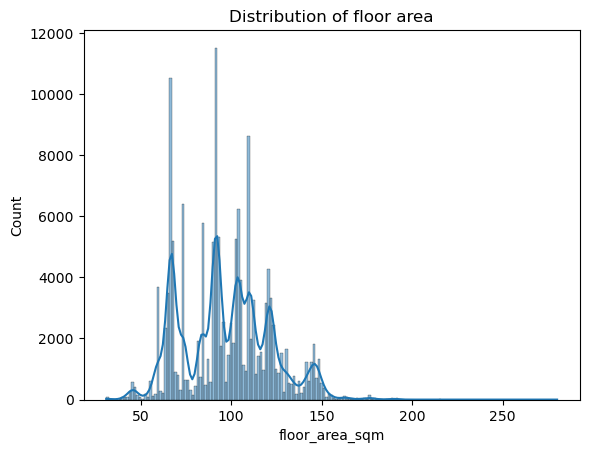

In [35]:
plt.title('Distribution of floor area')
sns.histplot(df,x='floor_area_sqm',kde=True);

It seems like transacted flats of a certain size range have many transactions and it is not normally distributed.

In [36]:
df['floor_area_sqm'].value_counts().to_frame('counts').head(20)

counts
67.0     9703
110.0    8034
92.0     6835
104.0    6236
93.0     5311
68.0     5203
90.0     5151
91.0     4679
84.0     4507
121.0    4278
103.0    3612
65.0     3500
73.0     3499
122.0    3318
74.0     2891
100.0    2518
105.0    2491
120.0    2187
60.0     1985
111.0    1967

Fortunately, the size of the HDB corresponds to `flat_type`. So let's look at them.

In [37]:
df[['flat_type','flat_model','full_flat_type']].value_counts().to_frame('counts').sort_values('flat_type')

counts
flat_type        flat_model             full_flat_type                           
1 ROOM           Improved               1 ROOM Improved                        82
2 ROOM           Standard               2 ROOM Standard                       594
                 Premium Apartment      2 ROOM Premium Apartment               37
                 Improved               2 ROOM Improved                       521
                 2-room                 2 ROOM 2-room                           4
                 Model A                2 ROOM Model A                        730
                 DBSS                   2 ROOM DBSS                             1
3 ROOM           Terrace                3 ROOM Terrace                         86
                 DBSS                   3 ROOM DBSS                           177
                 Standard               3 ROOM Standard                      2522
                 Premium Apartment      3 ROOM Premium Apartment              391
                 Simplified             3 ROOM Simplified                    1929
                 Improved               3 ROOM Improved                     10238
                 Model A                3 ROOM Model A                       8335
                 New Generation         3 ROOM New Generation               15227
4 ROOM           Standard               4 ROOM Standard                        65
                 Type S1                4 ROOM Type S1                        242
                 Premium Apartment      4 ROOM Premium Apartment             7541
                 DBSS                   4 ROOM DBSS                           598
                 Model A                4 ROOM Model A                      34780
                 Premium Apartment Loft 4 ROOM Premium Apartment Loft          36
                 Adjoined flat          4 ROOM Adjoined flat                   27
                 Improved               4 ROOM Improved                      1847
                 Model A2               4 ROOM Model A2                      2064
                 Simplified             4 ROOM Simplified                    5309
                 Terrace                4 ROOM Terrace                          9
                 New Generation         4 ROOM New Generation                8139
5 ROOM           Improved-Maisonette    5 ROOM Improved-Maisonette             19
                 Premium Apartment Loft 5 ROOM Premium Apartment Loft          14
                 Improved               5 ROOM Improved                     25699
                 Model A-Maisonette     5 ROOM Model A-Maisonette             262
                 Type S2                5 ROOM Type S2                        127
                 Adjoined flat          5 ROOM Adjoined flat                  138
                 DBSS                   5 ROOM DBSS                           863
                 Standard               5 ROOM Standard                      1686
                 Model A                5 ROOM Model A                       1941
                 Premium Apartment      5 ROOM Premium Apartment             5483
EXECUTIVE        Premium Apartment      EXECUTIVE Premium Apartment          1435
                 Premium Maisonette     EXECUTIVE Premium Maisonette           15
                 Maisonette             EXECUTIVE Maisonette                 4362
                 Adjoined flat          EXECUTIVE Adjoined flat                95
                 Apartment              EXECUTIVE Apartment                  6079
MULTI-GENERATION Multi Generation       MULTI-GENERATION Multi Generation      56

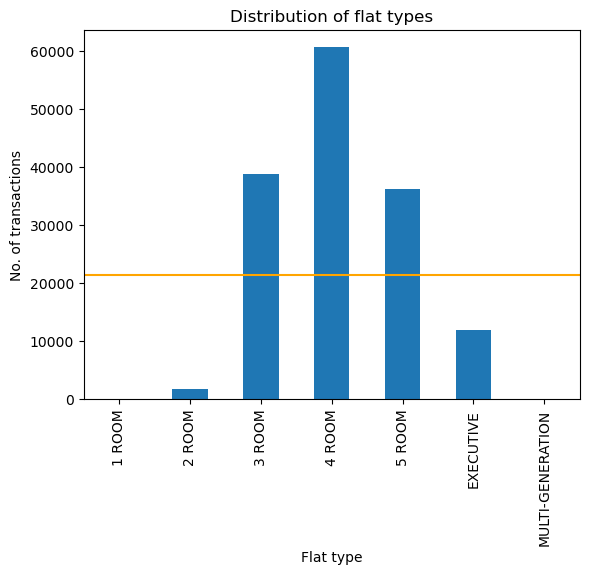

In [38]:
df_flat = df.groupby(['flat_type'])['flat_type'].count()

df_flat.plot(kind='bar')
plt.title('Distribution of flat types')
plt.xlabel('Flat type')
plt.ylabel('No. of transactions')

plt.hlines(df_flat.mean(),xmin=-2,xmax=100, color='orange')
# plt.text(1,df_flat.mean()-6000,f"Mean number of transactions = {df_flat.mean():.2f}", color='orange')

plt.show()

We can see that majority of transactions are for 4 room flats.

Let's explore distribution of model types within each flat type.

In [39]:
def model_bars(flat_type):

    df_flat = df[df['flat_type']==flat_type].groupby(['flat_model'])['flat_model'].count()

    df_flat.plot(kind='bar')
    plt.title(f'Distribution of flat model for {flat_type}')
    plt.xlabel('Flat model')
    plt.ylabel('No. of transactions')

    plt.hlines(df_flat.mean(),xmin=-2,xmax=100, color='orange')
    plt.text(0,df_flat.mean(),f"Mean={df_flat.mean():.2f}", color='orange')

    plt.show()
    return

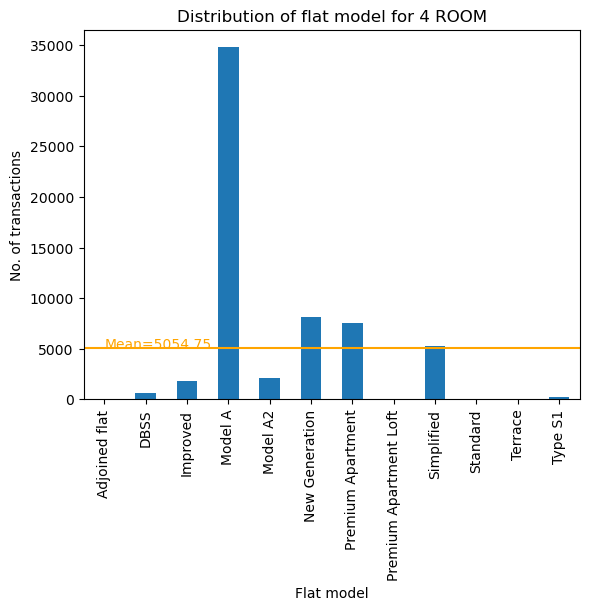

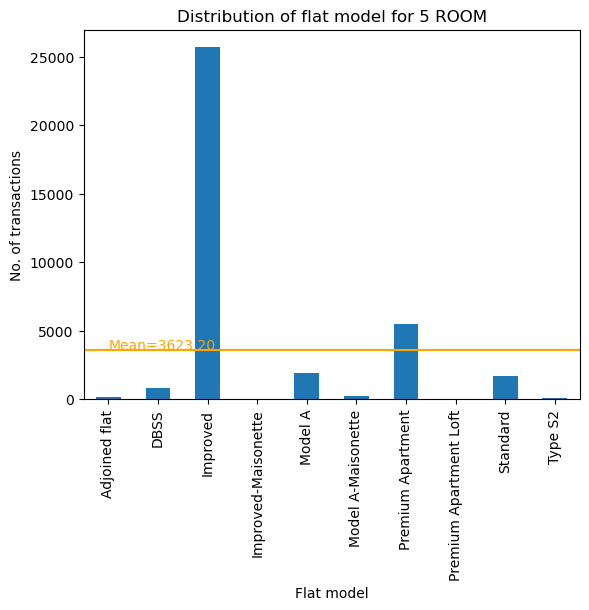

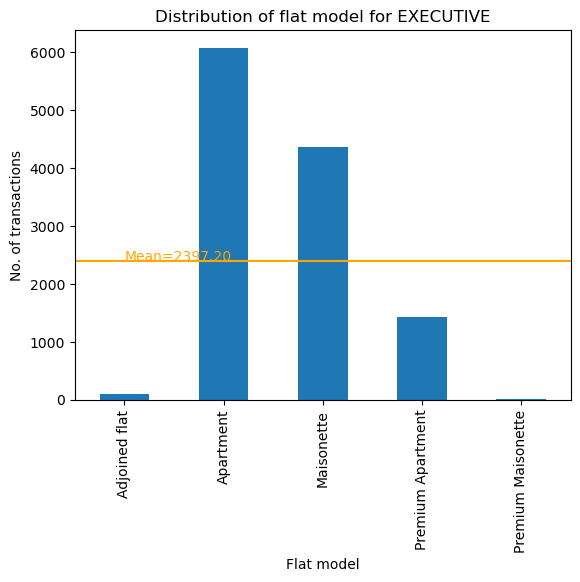

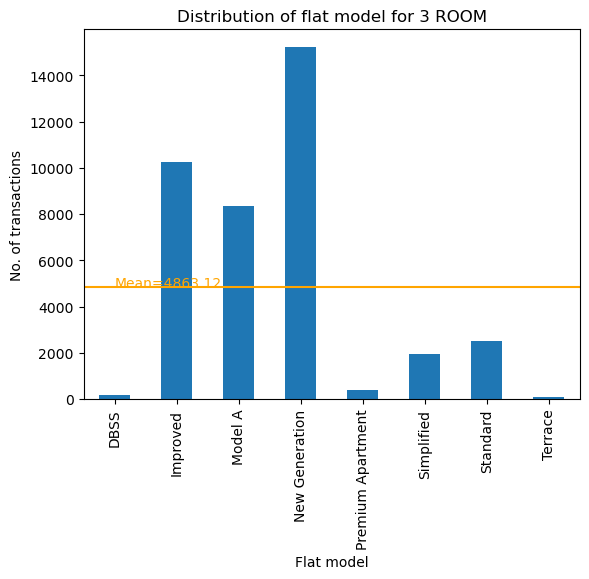

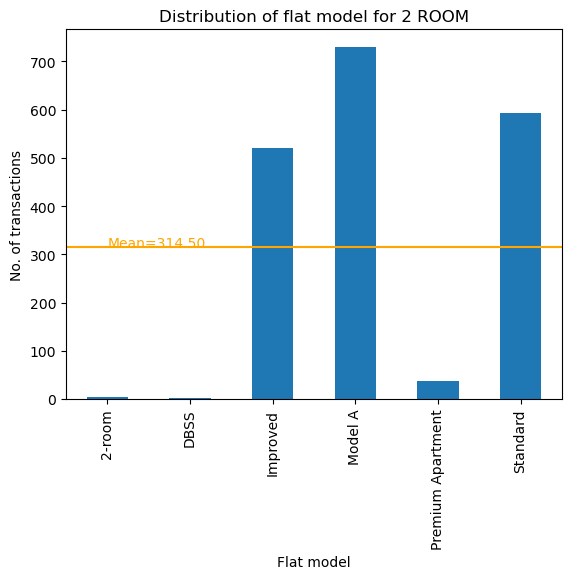

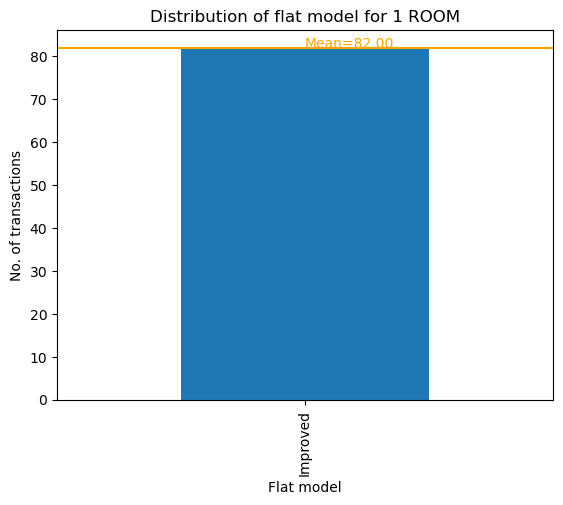

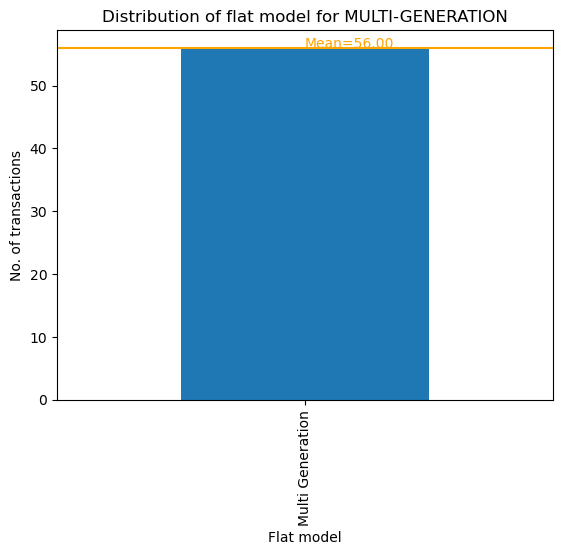

In [40]:
flat_types = df['flat_type'].unique().tolist()

for flat_type in flat_types:
    model_bars(flat_type)

For 1 room and multigeneration, they have only one model.

For 2 room, the trascations are mainly spread between `Improved`, `Model A`, and `Standard`.

For 3 room, `New Generation`, `Improved`, and `Model A` make up the majority of transactions. We also note that we have a `DBSS`, `Terrace`, and `Premium Apartment` which are known to cost more than the average 3 room flat.

For 4 room, `Model A` has significantly more transactions than other types. We also note that `Type S1` is a new type can only be found in Pinnacle @ Duxton, which is known for high transaction prices.

For 5 room flats, `Improved` has significantly more transactions than other types. We also note that `Type S2` is a new type can only be found in Pinnacle @ Duxton, which is known for high transaction prices.

In [41]:
def box_median_sorted(df, feature1:str, feature2:str, outliers:bool):

    fig, ax = plt.subplots(figsize=(10,10), dpi=300)
    plt.title(f'Boxplots of {feature1} wrt {feature2}')

    temp = (df.loc[:,[feature1,feature2]]
            .groupby([feature2])
            .median()
            .sort_values(by=feature1))

    sns.boxplot(x=feature1, y=feature2, order=temp.index,showfliers=outliers, color='skyblue',data=df,orient='h')
    for tick in ax.yaxis.get_major_ticks()[1::2]:
        tick.set_pad(20)
    plt.show()

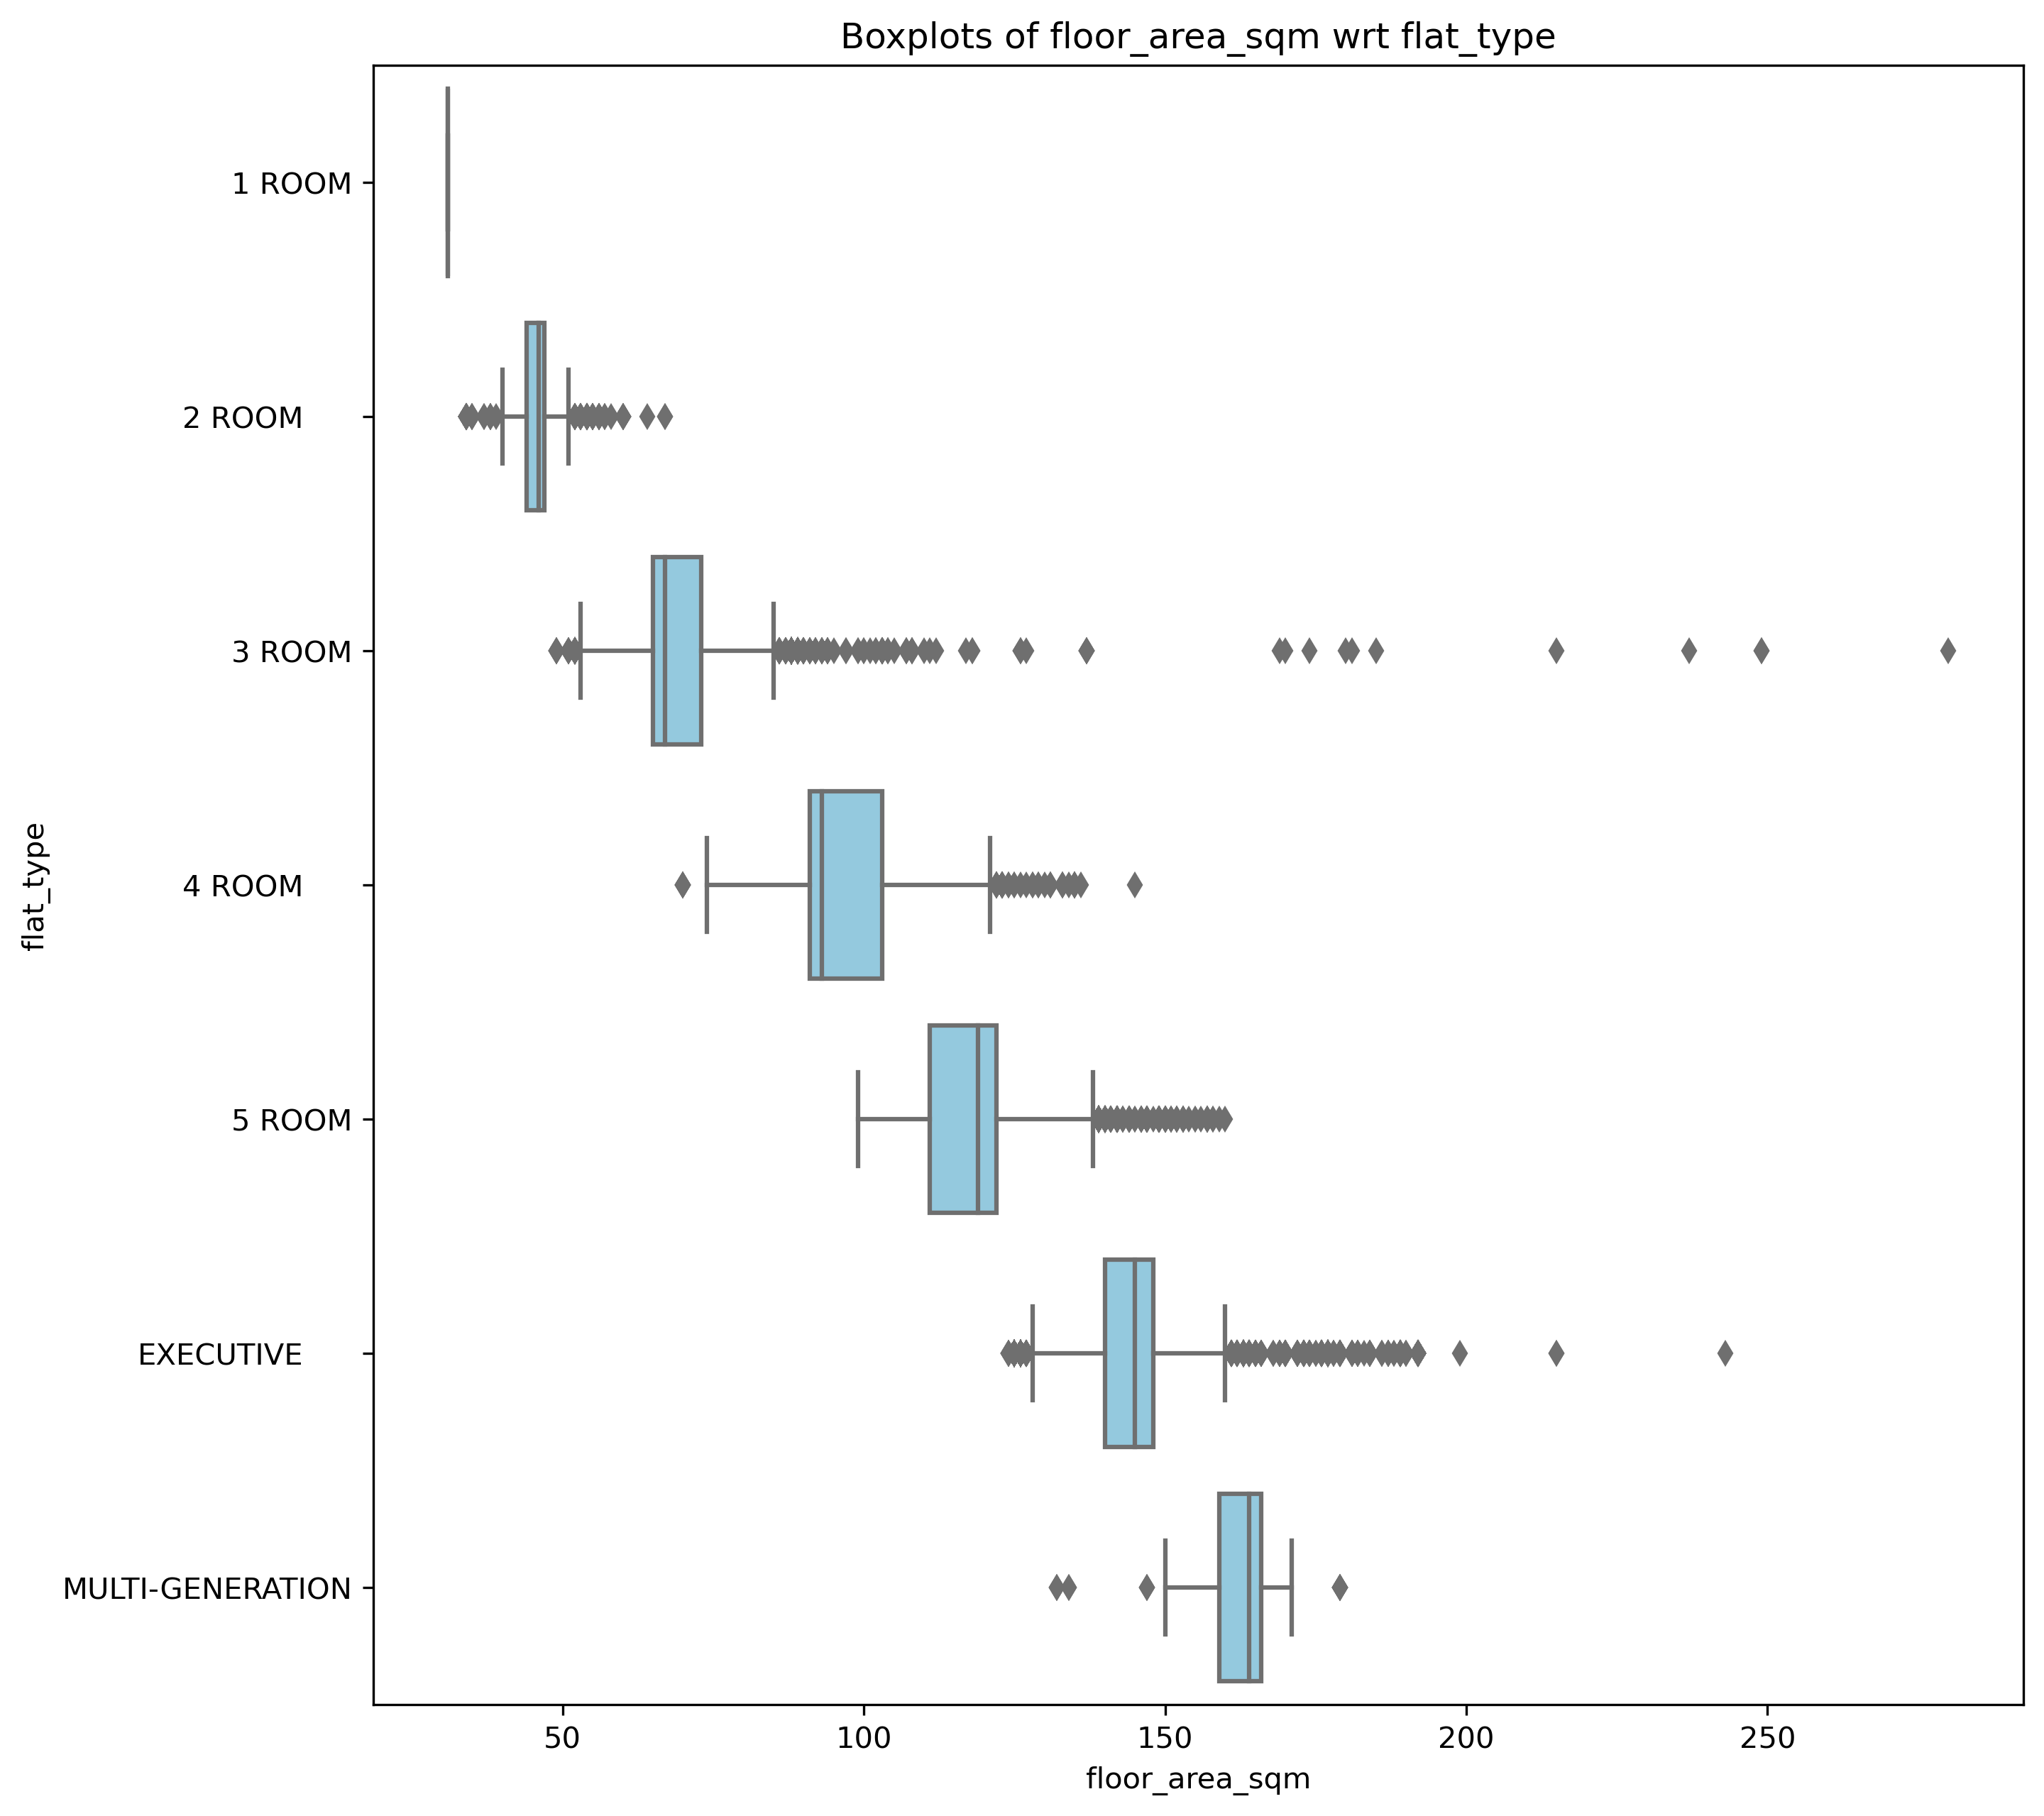

In [42]:
box_median_sorted(df, 'floor_area_sqm','flat_type',True)

The floor areas corresponds with the flat type. So for our model, we would use either `flat_type` or `floor_area_sqm` as a feature to avoid collinearity.

We can see that for flats classifed as 3 room, there are many outliers, which can be explained by flat models as discussed earlier.

## Block information

In [43]:
df[['max_floor_lvl','hdb_age','1room_sold','2room_sold','3room_sold', '4room_sold','5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold', '1room_rental', '2room_rental', '3room_rental', 'other_room_rental','residential', 'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion']].describe()

max_floor_lvl        hdb_age     1room_sold     2room_sold  \
count  149805.000000  149805.000000  149805.000000  149805.000000   
mean       15.107914      28.683362       0.139581       1.765615   
std         6.194526      12.040577       5.964397      11.685666   
min         2.000000       3.000000       0.000000       0.000000   
25%        12.000000      20.000000       0.000000       0.000000   
50%        13.000000      31.000000       0.000000       0.000000   
75%        16.000000      37.000000       0.000000       0.000000   
max        50.000000      55.000000     255.000000     225.000000   

          3room_sold     4room_sold     5room_sold      exec_sold  \
count  149805.000000  149805.000000  149805.000000  149805.000000   
mean       39.277033      49.927406      26.304082       5.973486   
std        68.858414      45.237296      33.489464      19.179633   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000      14.000000       0.000000       0.000000   
50%         0.000000      44.000000       3.000000       0.000000   
75%        66.000000      73.000000      50.000000       0.000000   
max       528.000000     316.000000     164.000000     135.000000   

       multigen_sold  studio_apartment_sold   1room_rental   2room_rental  \
count  149805.000000          149805.000000  149805.000000  149805.000000   
mean        0.024105               0.431054       0.063963       0.625827   
std         1.138619               5.211552       2.033778      11.224543   
min         0.000000               0.000000       0.000000       0.000000   
25%         0.000000               0.000000       0.000000       0.000000   
50%         0.000000               0.000000       0.000000       0.000000   
75%         0.000000               0.000000       0.000000       0.000000   
max        66.000000             142.000000     110.000000     452.000000   

        3room_rental  other_room_rental  residential     commercial  \
count  149805.000000      149805.000000     149805.0  149805.000000   
mean        0.059577           0.000340          1.0       0.191930   
std         0.669054           0.024372          0.0       0.393819   
min         0.000000           0.000000          1.0       0.000000   
25%         0.000000           0.000000          1.0       0.000000   
50%         0.000000           0.000000          1.0       0.000000   
75%         0.000000           0.000000          1.0       0.000000   
max        24.000000           2.000000          1.0       1.000000   

       market_hawker  multistorey_carpark  precinct_pavilion  
count  149805.000000        149805.000000      149805.000000  
mean        0.000100             0.000280           0.000754  
std         0.010006             0.016742           0.027455  
min         0.000000             0.000000           0.000000  
25%         0.000000             0.000000           0.000000  
50%         0.000000             0.000000           0.000000  
75%         0.000000             0.000000           0.000000  
max         1.000000             1.000000           1.000000

The average HDB block with transactions is about 15 storeys high, with the shorest at 2 storeys and the tallest at 50 storeys.

The average block with transactions is about 28.6 years old, with a minimum age of 3 years (before the Minimum Occupation Period (MOP) which is allowed under the circumstances of divorce, avoiding bankruptcy, and renouncement or loss of citizenship, the MOP is usually 5 years) and a maximum age of 55 years. Another possibility for the age being less than 5 is that the MOP of SERS flats start earlier.

It is also clear that the HDB age is wrt to the latest transaction date of April 2021.

The mean of the other features can be used as an index of how likely there are other flat types within the block.

A mean of 0 would mean that there are blocks with exclusively a single flat type.

We can see from our data, that it is very likely that 3, 4, and 5 room flats are very likely to be in mixed blocks (blocks with several flat types).

Focusing on rental flats, it is very unlikely that rental flats are from mixed blocks. And so are not be a big factor in resale prices.

We can see that all transacted flats have other residential flats. So we can drop that feature.

The number of market/hawker, multistorey carpark and precinct pavilion as really small and will very unlikely contribute much to our analysis. So we will drop those features as well.

About 19% of the transacted flats have commercial shops (like provision shops). It might be a plus factor for prices.

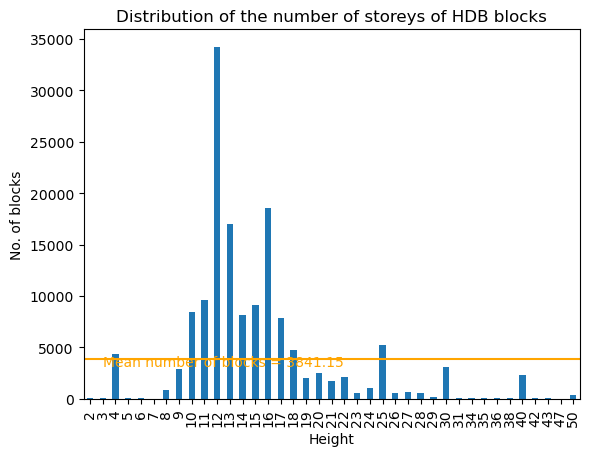

In [44]:
df_max_floor = df.groupby(['max_floor_lvl'])['max_floor_lvl'].count()

df_max_floor.plot(kind='bar')
plt.title('Distribution of the number of storeys of HDB blocks')
plt.xlabel('Height')
plt.ylabel('No. of blocks')

plt.hlines(df_max_floor.mean(),xmin=-2,xmax=100, color='orange')
plt.text(1,df_max_floor.mean()-600,f"Mean number of blocks = {df_max_floor.mean():.2f}", color='orange')

plt.show()

The number of storeys are not normally distributed.

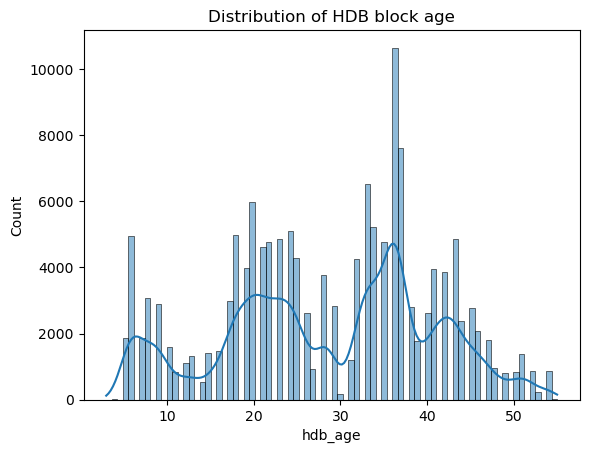

In [45]:
plt.title('Distribution of HDB block age')
sns.histplot(df,x='hdb_age',kde=True);

The age of the transacted flats are not normally distributed.

We can clearly see that around the MOP, there is a spike in transactions (probably aspiring BTOs profiteers).

If we assume that people stay in their flats from the start of the lease date, we can see that after 30 odd years, people would want to sell their flats (maybe after their children has gotten married and they decide to downgrade). Another peak is between 15 to 25 years, where homeowners probably want to upgrade due to various needs.

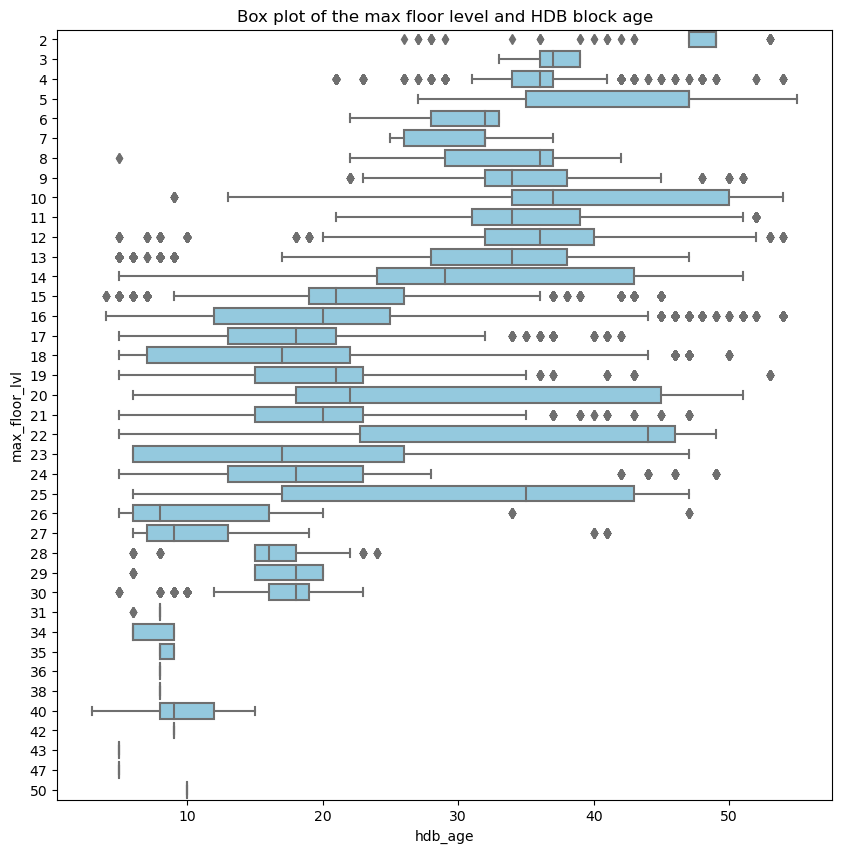

In [46]:
plt.figure(figsize=(10,10))
plt.title('Box plot of the max floor level and HDB block age')
sns.boxplot(x='hdb_age', y='max_floor_lvl',showfliers=True, color='skyblue',data=df,orient='h');

We can clearly see that blocks above 28 storeys are at most 25 years old.

Due to the variance of ages, it is unlikely they are collinear.

In [47]:
df[df['hdb_age']<5].shape

(26, 78)

In [48]:
df[df['hdb_age']<5][['resale_price','address','lease_commence_date','year_completed','hdb_age']].sort_values(by='resale_price')

resale_price                    address lease_commence_date  \
107628       2.40000  807A, CHOA CHU KANG AVE 1          2017-01-01   
21334        2.50000  807A, CHOA CHU KANG AVE 1          2017-01-01   
149246       2.56000  807A, CHOA CHU KANG AVE 1          2017-01-01   
126145       2.90000  807A, CHOA CHU KANG AVE 1          2017-01-01   
26312        3.26000  807A, CHOA CHU KANG AVE 1          2017-01-01   
11257        3.35888  807A, CHOA CHU KANG AVE 1          2017-01-01   
62478        3.36000  807A, CHOA CHU KANG AVE 1          2017-01-01   
146704       3.50500  807A, CHOA CHU KANG AVE 1          2017-01-01   
92467        3.55000  807A, CHOA CHU KANG AVE 1          2017-01-01   
63200        3.55000  807A, CHOA CHU KANG AVE 1          2017-01-01   
111841       3.60000  807A, CHOA CHU KANG AVE 1          2017-01-01   
74870        3.70000  807A, CHOA CHU KANG AVE 1          2017-01-01   
6271         3.70000  807A, CHOA CHU KANG AVE 1          2017-01-01   
42575        5.95000       871C, TAMPINES ST 86          2017-01-01   
146366       6.25000       871C, TAMPINES ST 86          2017-01-01   
32780        6.28000       871C, TAMPINES ST 86          2017-01-01   
85009        6.33000       871C, TAMPINES ST 86          2017-01-01   
68034        6.47000       871C, TAMPINES ST 86          2017-01-01   
26005        6.58088       871C, TAMPINES ST 86          2017-01-01   
18618        6.68000       871C, TAMPINES ST 86          2017-01-01   
5781         6.70000       871C, TAMPINES ST 86          2017-01-01   
92024        6.73000       871C, TAMPINES ST 86          2017-01-01   
21072        6.75000       871C, TAMPINES ST 86          2017-01-01   
136819       6.80000       871C, TAMPINES ST 86          2017-01-01   
95758        9.57888       440C, CLEMENTI AVE 3          2018-01-01   
6571        10.95000       440C, CLEMENTI AVE 3          2018-01-01   

       year_completed  hdb_age  
107628     2015-01-01        4  
21334      2015-01-01        4  
149246     2015-01-01        4  
126145     2015-01-01        4  
26312      2015-01-01        4  
11257      2015-01-01        4  
62478      2015-01-01        4  
146704     2015-01-01        4  
92467      2015-01-01        4  
63200      2015-01-01        4  
111841     2015-01-01        4  
74870      2015-01-01        4  
6271       2015-01-01        4  
42575      2015-01-01        4  
146366     2015-01-01        4  
32780      2015-01-01        4  
85009      2015-01-01        4  
68034      2015-01-01        4  
26005      2015-01-01        4  
18618      2015-01-01        4  
5781       2015-01-01        4  
92024      2015-01-01        4  
21072      2015-01-01        4  
136819     2015-01-01        4  
95758      2017-01-01        3  
6571       2017-01-01        3

For most of the flats, they might be quite close to MOP but age was recorded at 4 years.

For the 2 flats that were sold at 3 years, upon further research, the block was part of SERS. Allowing the owners to profit from it.

We will look at single type blocks vs mix blocks next.

In [49]:
df['block_type']=np.nan

def block_sorter(row):
    type_count=0
    hdb_types = ['1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold']
    for hdb_type in hdb_types:
        if row[hdb_type]!=0:
            type_count+=1
    if type_count==1:
        row['block_type']='single'
    if type_count>1:
        row['block_type']='mixed'
    return row

df = df.apply(block_sorter, axis = 1)

In [50]:
df[['block_type']].head()

block_type
0      mixed
1      mixed
2      mixed
3      mixed
4      mixed

In [51]:
df['block_type'].isnull().sum()

0

In [52]:
df['block_type'].value_counts()

mixed     111414
single     38391
Name: block_type, dtype: int64

In [53]:
df['block_type'].value_counts(normalize=True)

mixed     0.743727
single    0.256273
Name: block_type, dtype: float64

About a quarter of the blocks are single type.

We might want to see the effect of having multiple flat types in the block on resale price.

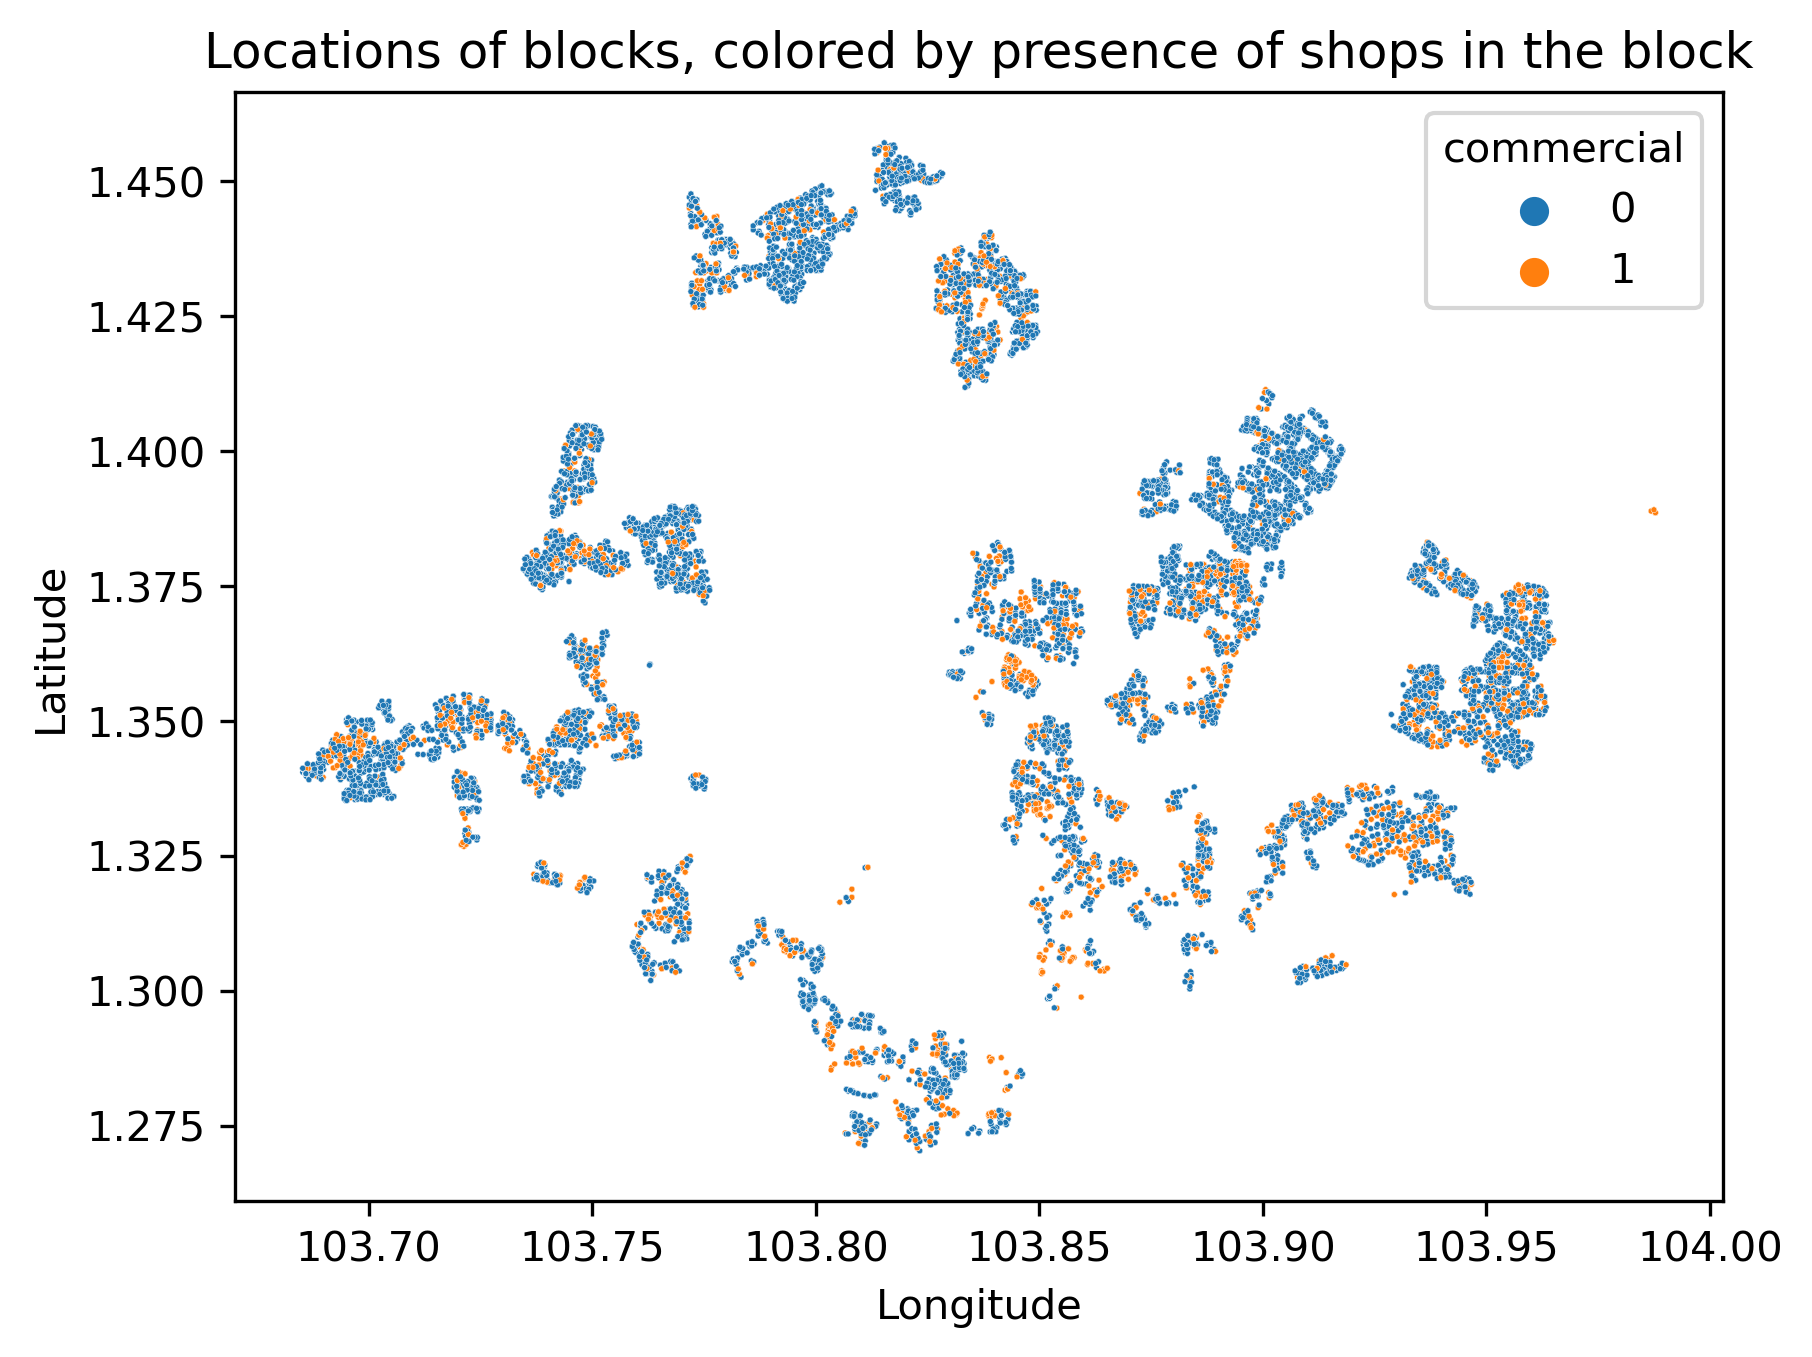

In [54]:
plt.figure(dpi=300)
plt.title('Locations of blocks, colored by presence of shops in the block')
sns.scatterplot(data=df, x='Longitude', y='Latitude',hue='commercial', s=2);

The blocks with shops in it looks evenly spread.

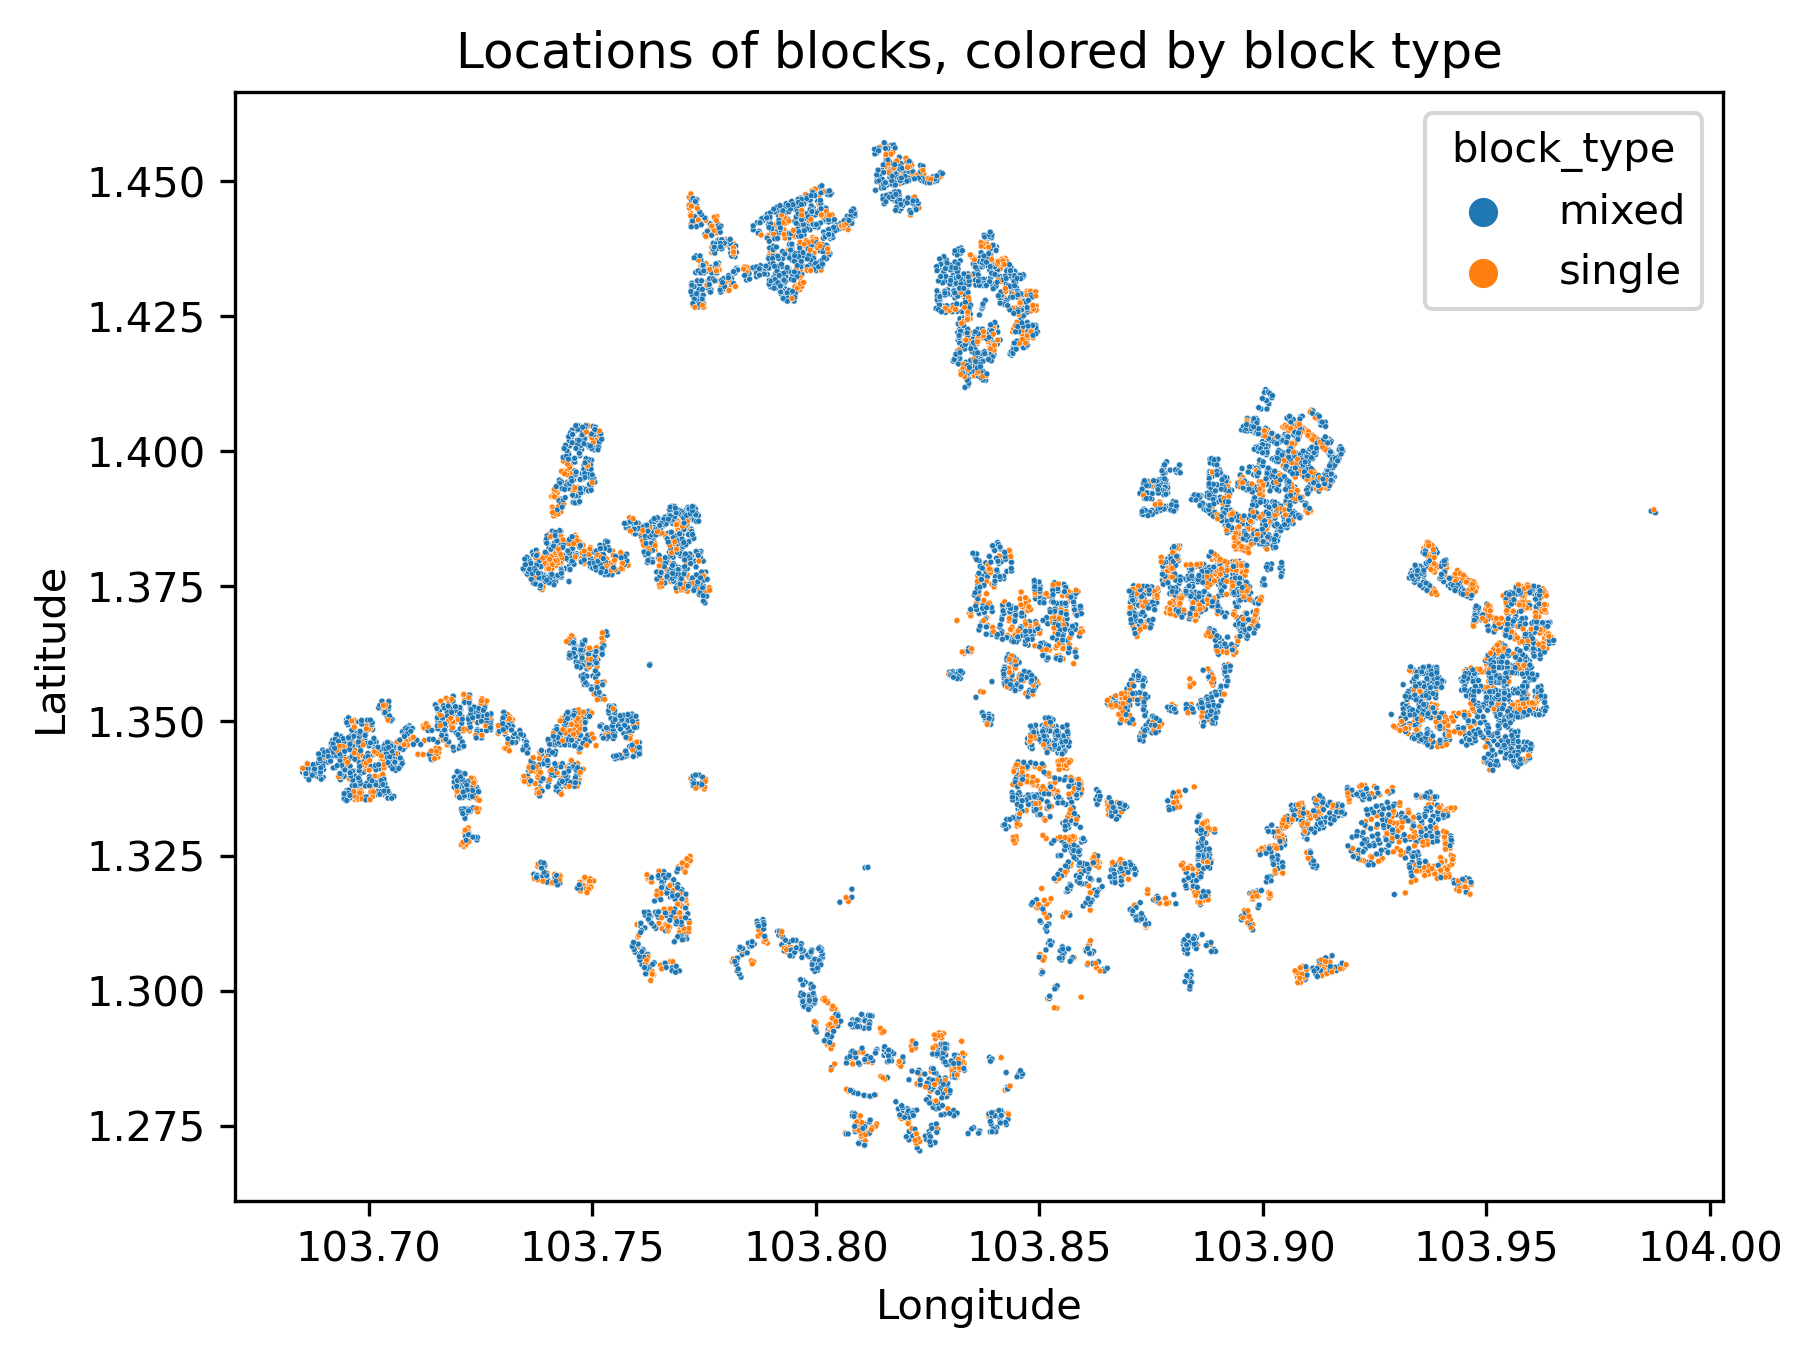

In [55]:
plt.figure(dpi=300)
plt.title('Locations of blocks, colored by block type')
sns.scatterplot(data=df, x='Longitude', y='Latitude',hue='block_type', s=2);

The spread of single and mixed blocks looks pretty even.

## Amenities Information

### Mall information

In [56]:
df[['Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km','Mall_Within_2km']].describe()

Mall_Nearest_Distance  Mall_Within_500m  Mall_Within_1km  \
count          149805.000000     149805.000000    149805.000000   
mean              664.239826          0.490097         1.796669   
std               368.739209          0.729616         1.421038   
min                 0.000000          0.000000         0.000000   
25%               391.473823          0.000000         1.000000   
50%               602.818388          0.000000         2.000000   
75%               868.818288          1.000000         3.000000   
max              3496.402910          6.000000        15.000000   

       Mall_Within_2km  
count    149805.000000  
mean          5.197650  
std           3.469713  
min           0.000000  
25%           3.000000  
50%           5.000000  
75%           6.000000  
max          43.000000

On average, flats are within 600m from a mall.

The furthest mall is about 3.5km away from a transacted flat.

There are some HDB flats that are integrated with malls, explaining the minimum nearest distance to be 0.

Also, there are flats that do not have malls within 2km. But on average, Singaporeans have 5 malls within a 2 km radius.

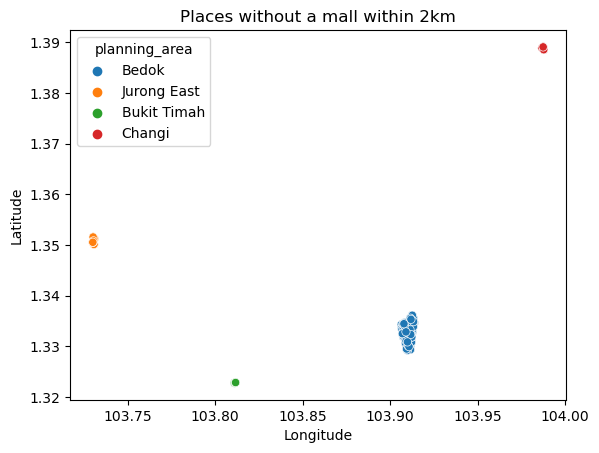

In [57]:
plt.title('Places without a mall within 2km')
sns.scatterplot(data=df[df['Mall_Within_2km']==0], x='Longitude', y='Latitude', hue='planning_area');

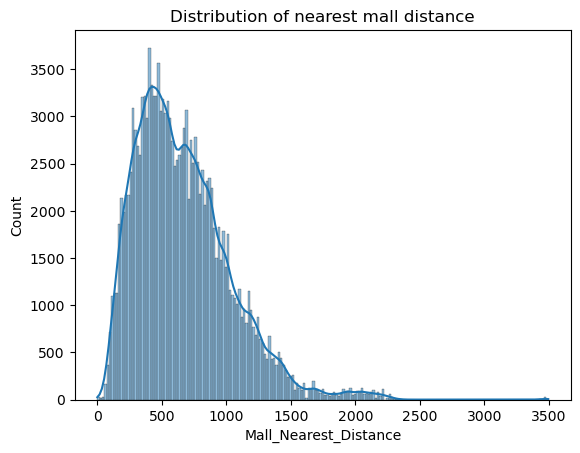

In [58]:
plt.title('Distribution of nearest mall distance')
sns.histplot(df,x='Mall_Nearest_Distance',kde=True);

The distribution of the nearest mall distance is close to a log-normal distribution.

### Hawker Centre information

In [59]:
df[['Hawker_Nearest_Distance','Hawker_Within_500m','Hawker_Within_1km','Hawker_Within_2km','hawker_food_stalls','hawker_market_stalls']].describe()

Hawker_Nearest_Distance  Hawker_Within_500m  Hawker_Within_1km  \
count            149805.000000       149805.000000      149805.000000   
mean               1167.736858            0.490357           1.409532   
std                1071.185899            0.767145           1.711411   
min                   1.873295            0.000000           0.000000   
25%                 371.492143            0.000000           0.000000   
50%                 776.137748            0.000000           1.000000   
75%                1671.774246            1.000000           2.000000   
max                4816.062542            5.000000           9.000000   

       Hawker_Within_2km  hawker_food_stalls  hawker_market_stalls  
count      149805.000000       149805.000000         149805.000000  
mean            3.801242           48.701746             58.293308  
std             4.009217           19.150471             55.513732  
min             0.000000            0.000000              0.000000  
25%             1.000000           40.000000              0.000000  
50%             2.000000           43.000000             52.000000  
75%             7.000000           60.000000             99.000000  
max            19.000000          226.000000            477.000000

On average, transacted flats are 1.17km away from a hawker centre that has an average of 48.7 stalls and about 10 market stalls.

The furthest is about 4.8 km away.

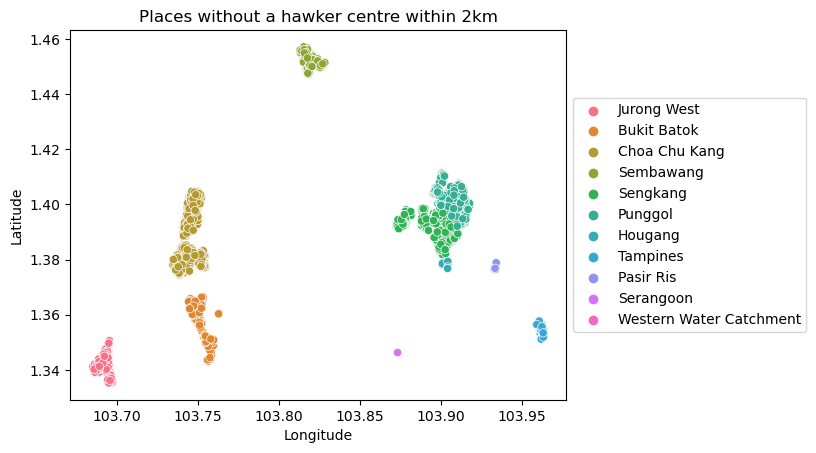

In [60]:
plt.title('Places without a hawker centre within 2km')
ax = sns.scatterplot(data=df[df['Hawker_Nearest_Distance']>2000], x='Longitude', y='Latitude', hue='planning_area')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

These places probably rely on their malls for food.

### Transport information

In [61]:
df[['mrt_nearest_distance', 'bus_interchange', 'mrt_interchange', 'bus_stop_nearest_distance']].describe()

mrt_nearest_distance  bus_interchange  mrt_interchange  \
count         149805.000000    149805.000000    149805.000000   
mean             764.021115         0.545095         0.261453   
std              429.111674         0.497964         0.439428   
min               21.971410         0.000000         0.000000   
25%              458.086393         0.000000         0.000000   
50%              681.853546         1.000000         0.000000   
75%              974.299230         1.000000         1.000000   
max             3544.504228         1.000000         1.000000   

       bus_stop_nearest_distance  
count              149805.000000  
mean                  115.194170  
std                    55.564721  
min                     9.001285  
25%                    74.959608  
50%                   107.686727  
75%                   146.624537  
max                   443.964584

The average distance from the nearest MRT is about 764 metres while the nearest bus stop is about 115 metres away.

21 metres from the MRT seem to be a little too close for comfort (because of noise) and may affect the price of the flat.

The furthest one can be from a bus stop is 443m which is about a 5 minute walk at normal speed.

On average about half of the nearest MRT stations are also bus interchanges and a quarter of MRT stations are train interchange stations.

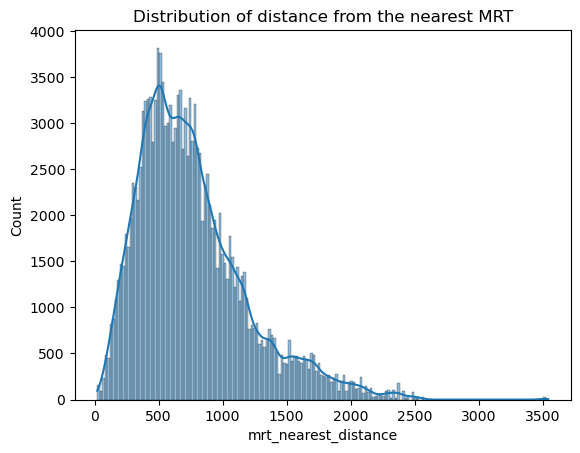

In [62]:
plt.title('Distribution of distance from the nearest MRT')
sns.histplot(df,x='mrt_nearest_distance',kde=True);

A log-normal distribution.

Most flats have access to an MRT within a 10 minute walk.

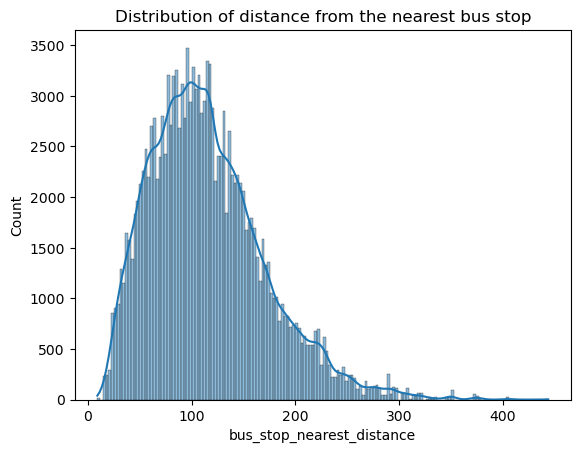

In [63]:
plt.title('Distribution of distance from the nearest bus stop')
sns.histplot(df,x='bus_stop_nearest_distance',kde=True);

Similarly, a log-normal distribution.

Given that the nearest bus stop is 5 minutes away, it is highly unlikely that proximity to a bus stop would greatly affect house prices.

## School Information

In [64]:
df[['pri_sch_nearest_distance','sec_sch_nearest_dist','pri_sch_affiliation','vacancy', 'affiliation', 'cutoff_point', 'pri_sch_latitude','pri_sch_longitude','sec_sch_latitude','sec_sch_longitude']].describe()

pri_sch_nearest_distance  sec_sch_nearest_dist  pri_sch_affiliation  \
count             149805.000000         149805.000000        149805.000000   
mean                 394.903494            507.628791             0.113187   
std                  234.186949            308.752257             0.316822   
min                   45.668324             38.913475             0.000000   
25%                  227.083163            289.176378             0.000000   
50%                  348.724666            446.671027             0.000000   
75%                  502.097957            642.519665             0.000000   
max                 3305.841039           3638.977233             1.000000   

             vacancy    affiliation   cutoff_point  pri_sch_latitude  \
count  149805.000000  149805.000000  149805.000000     149805.000000   
mean       55.308948       0.031935     210.131070          1.366230   
std        17.883460       0.175827      20.005265          0.042692   
min        20.000000       0.000000     188.000000          1.274962   
25%        44.000000       0.000000     188.000000          1.337289   
50%        54.000000       0.000000     208.000000          1.364639   
75%        67.000000       0.000000     224.000000          1.393910   
max       110.000000       1.000000     260.000000          1.456667   

       pri_sch_longitude  sec_sch_latitude  sec_sch_longitude  
count      149805.000000     149805.000000      149805.000000  
mean          103.839040          1.365954         103.839268  
std             0.072641          0.042622           0.072641  
min           103.687724          1.276029         103.687207  
25%           103.773754          1.337545         103.776008  
50%           103.844210          1.364334         103.842719  
75%           103.897865          1.391781         103.899872  
max           103.962919          1.453280         103.961105

The average distance from a primary school is 395 metres and for secondary school, about 508 metres.

The nearest primary school to a transacted flat has about on average 55 vacancies and have at least 20 vacancies and at most 110 vacancies.

The nearest secondary school has an average cut off point of 210, at least have 188 and at most 260 (out of 300). This now-defunct measure of primary school achievement is a proxy for how popular a secondary school is for a student wanting to get into the Express stream.

For the transacted flats, 11% of the closest primary school have an affiliated secondary school while 3% of the closest secondary school has an affiliation to a primary school. That implies that it may be more important for some buyers to have a primary school to have an affiliated to a secondary school (because to get into the Express stream, there is a discount).

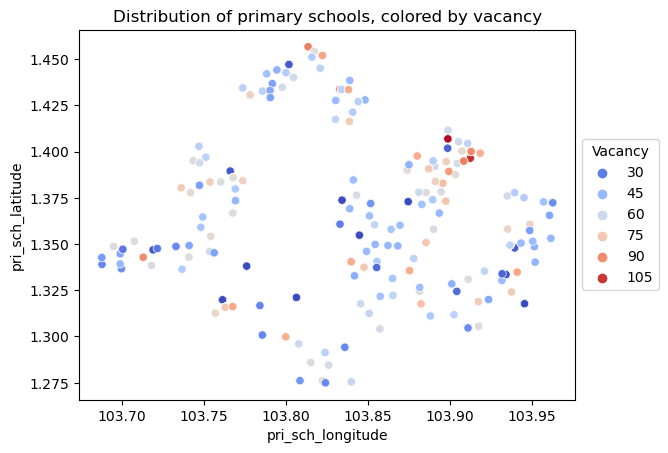

In [65]:
plt.title('Distribution of primary schools, colored by vacancy')
ax = sns.scatterplot(data=df, x='pri_sch_longitude', y='pri_sch_latitude', hue='vacancy', palette='coolwarm')
ax.legend(title='Vacancy',loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

The north east have many schools with high vacancies. It also corresponds with newer estates in Punggol and Sengkang.

The south have more sparse options for primary schools as they generally have older estates like Queenstown.

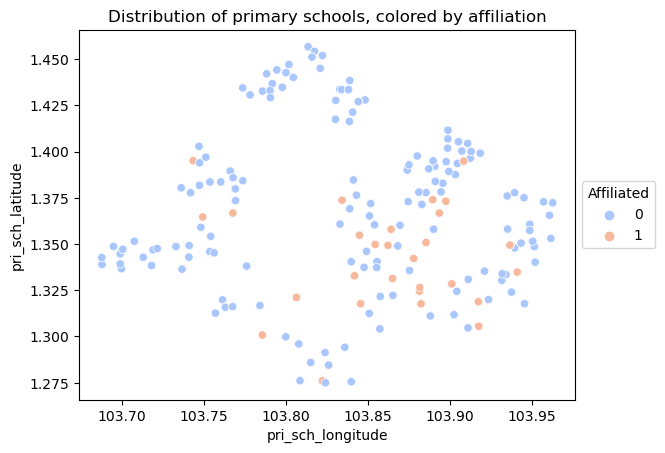

In [66]:
plt.title('Distribution of primary schools, colored by affiliation')
ax = sns.scatterplot(data=df, x='pri_sch_longitude', y='pri_sch_latitude', hue='pri_sch_affiliation', palette='coolwarm')
ax.legend(title = 'Affiliated', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Buyers looking for a secondary school affiliated primary school should avoid the north.

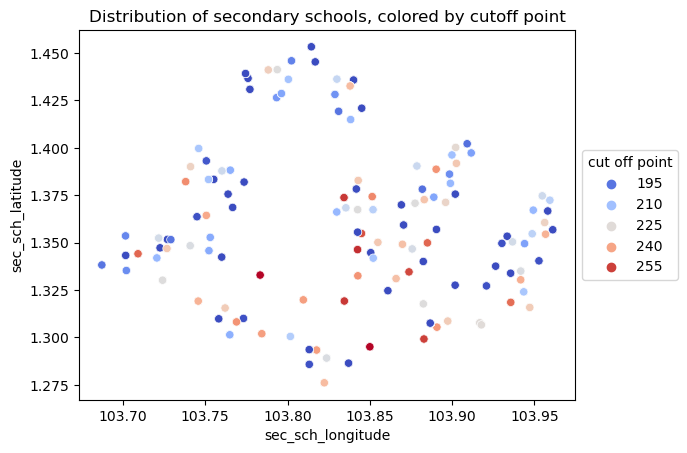

In [67]:
plt.title('Distribution of secondary schools, colored by cutoff point')
ax = sns.scatterplot(data=df, x='sec_sch_longitude', y='sec_sch_latitude', hue='cutoff_point', palette='coolwarm')
ax.legend(title = 'cut off point', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

The central area have schools with higher cutoff points.

However, every region has a school with an above average (210) cutoff point.

---

## Resale Price correlation with single features

We will now proceed to picking features for our initial linear model.

First we would like to see the distribution of house prices across Singapore.

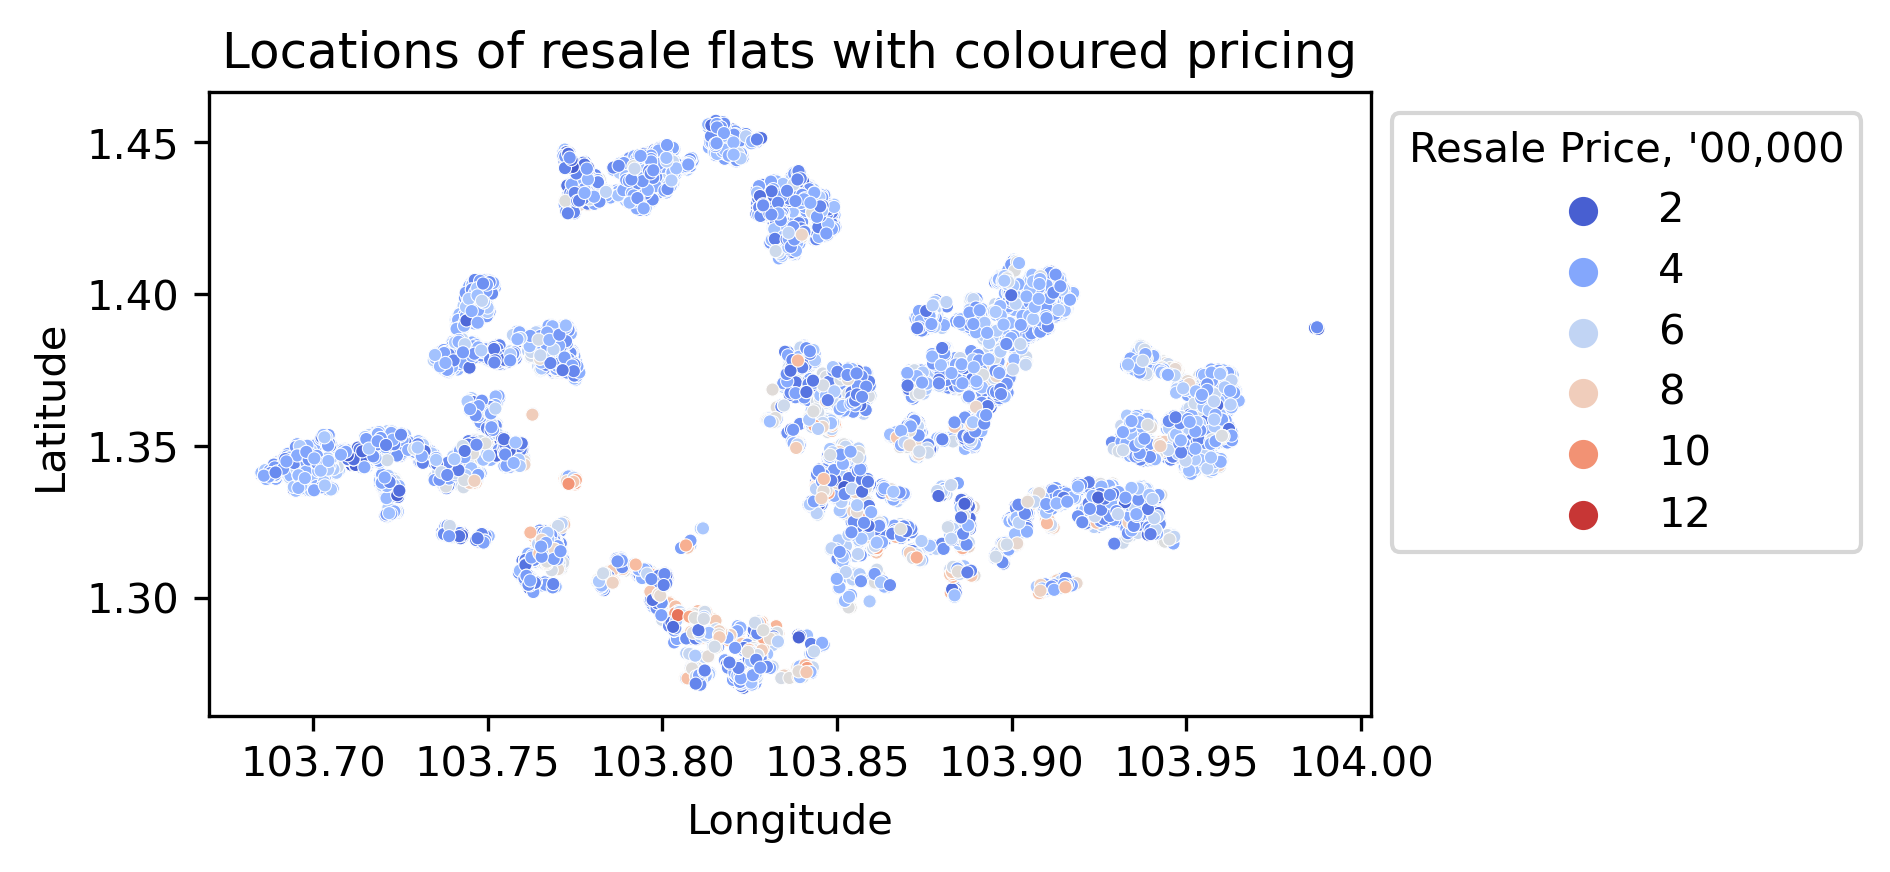

In [68]:
fig, ax = plt.subplots(figsize=(5,2.7), dpi=300)
plt.title('Locations of resale flats with coloured pricing')
ax = sns.scatterplot(x='Longitude', y='Latitude', hue='resale_price', data=df, palette='coolwarm', s=10)
plt.legend(title="Resale Price, \'00,000")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

It appears that there are certain regions that have more expensive resale flats. So planning area would be a good feature to predict prices.

We'll do a correlation search using corr().

To correlate with the transaction date, we need to convert datetime objects to ordinal numbers.

In [69]:
date_data = ['Tranc_YearMonth','Tranc_Year','Tranc_Month','lease_commence_date','year_completed']
for datetime_column in date_data:
    df[datetime_column] = df[datetime_column].map(lambda d: d.toordinal())

In [70]:
list_of_numeric_features = df.select_dtypes(include='number').columns.to_list()

We'll use a function highlight correlations greater than 0.5.

In [71]:
def find_sig_corr(df,feature):
    corr = df.corrwith(df[feature])['resale_price']
    if abs(corr)>0.5:
        print(f"{feature}:{corr}")
    return

for feature in list_of_numeric_features:
    find_sig_corr(df, feature)

id:0.5224823188266957
floor_area_sqm:0.6567756177788726
resale_price:0.9999999999999999
floor_area_sqft:0.6567756177788726
price_per_sqft:0.6045941612388434


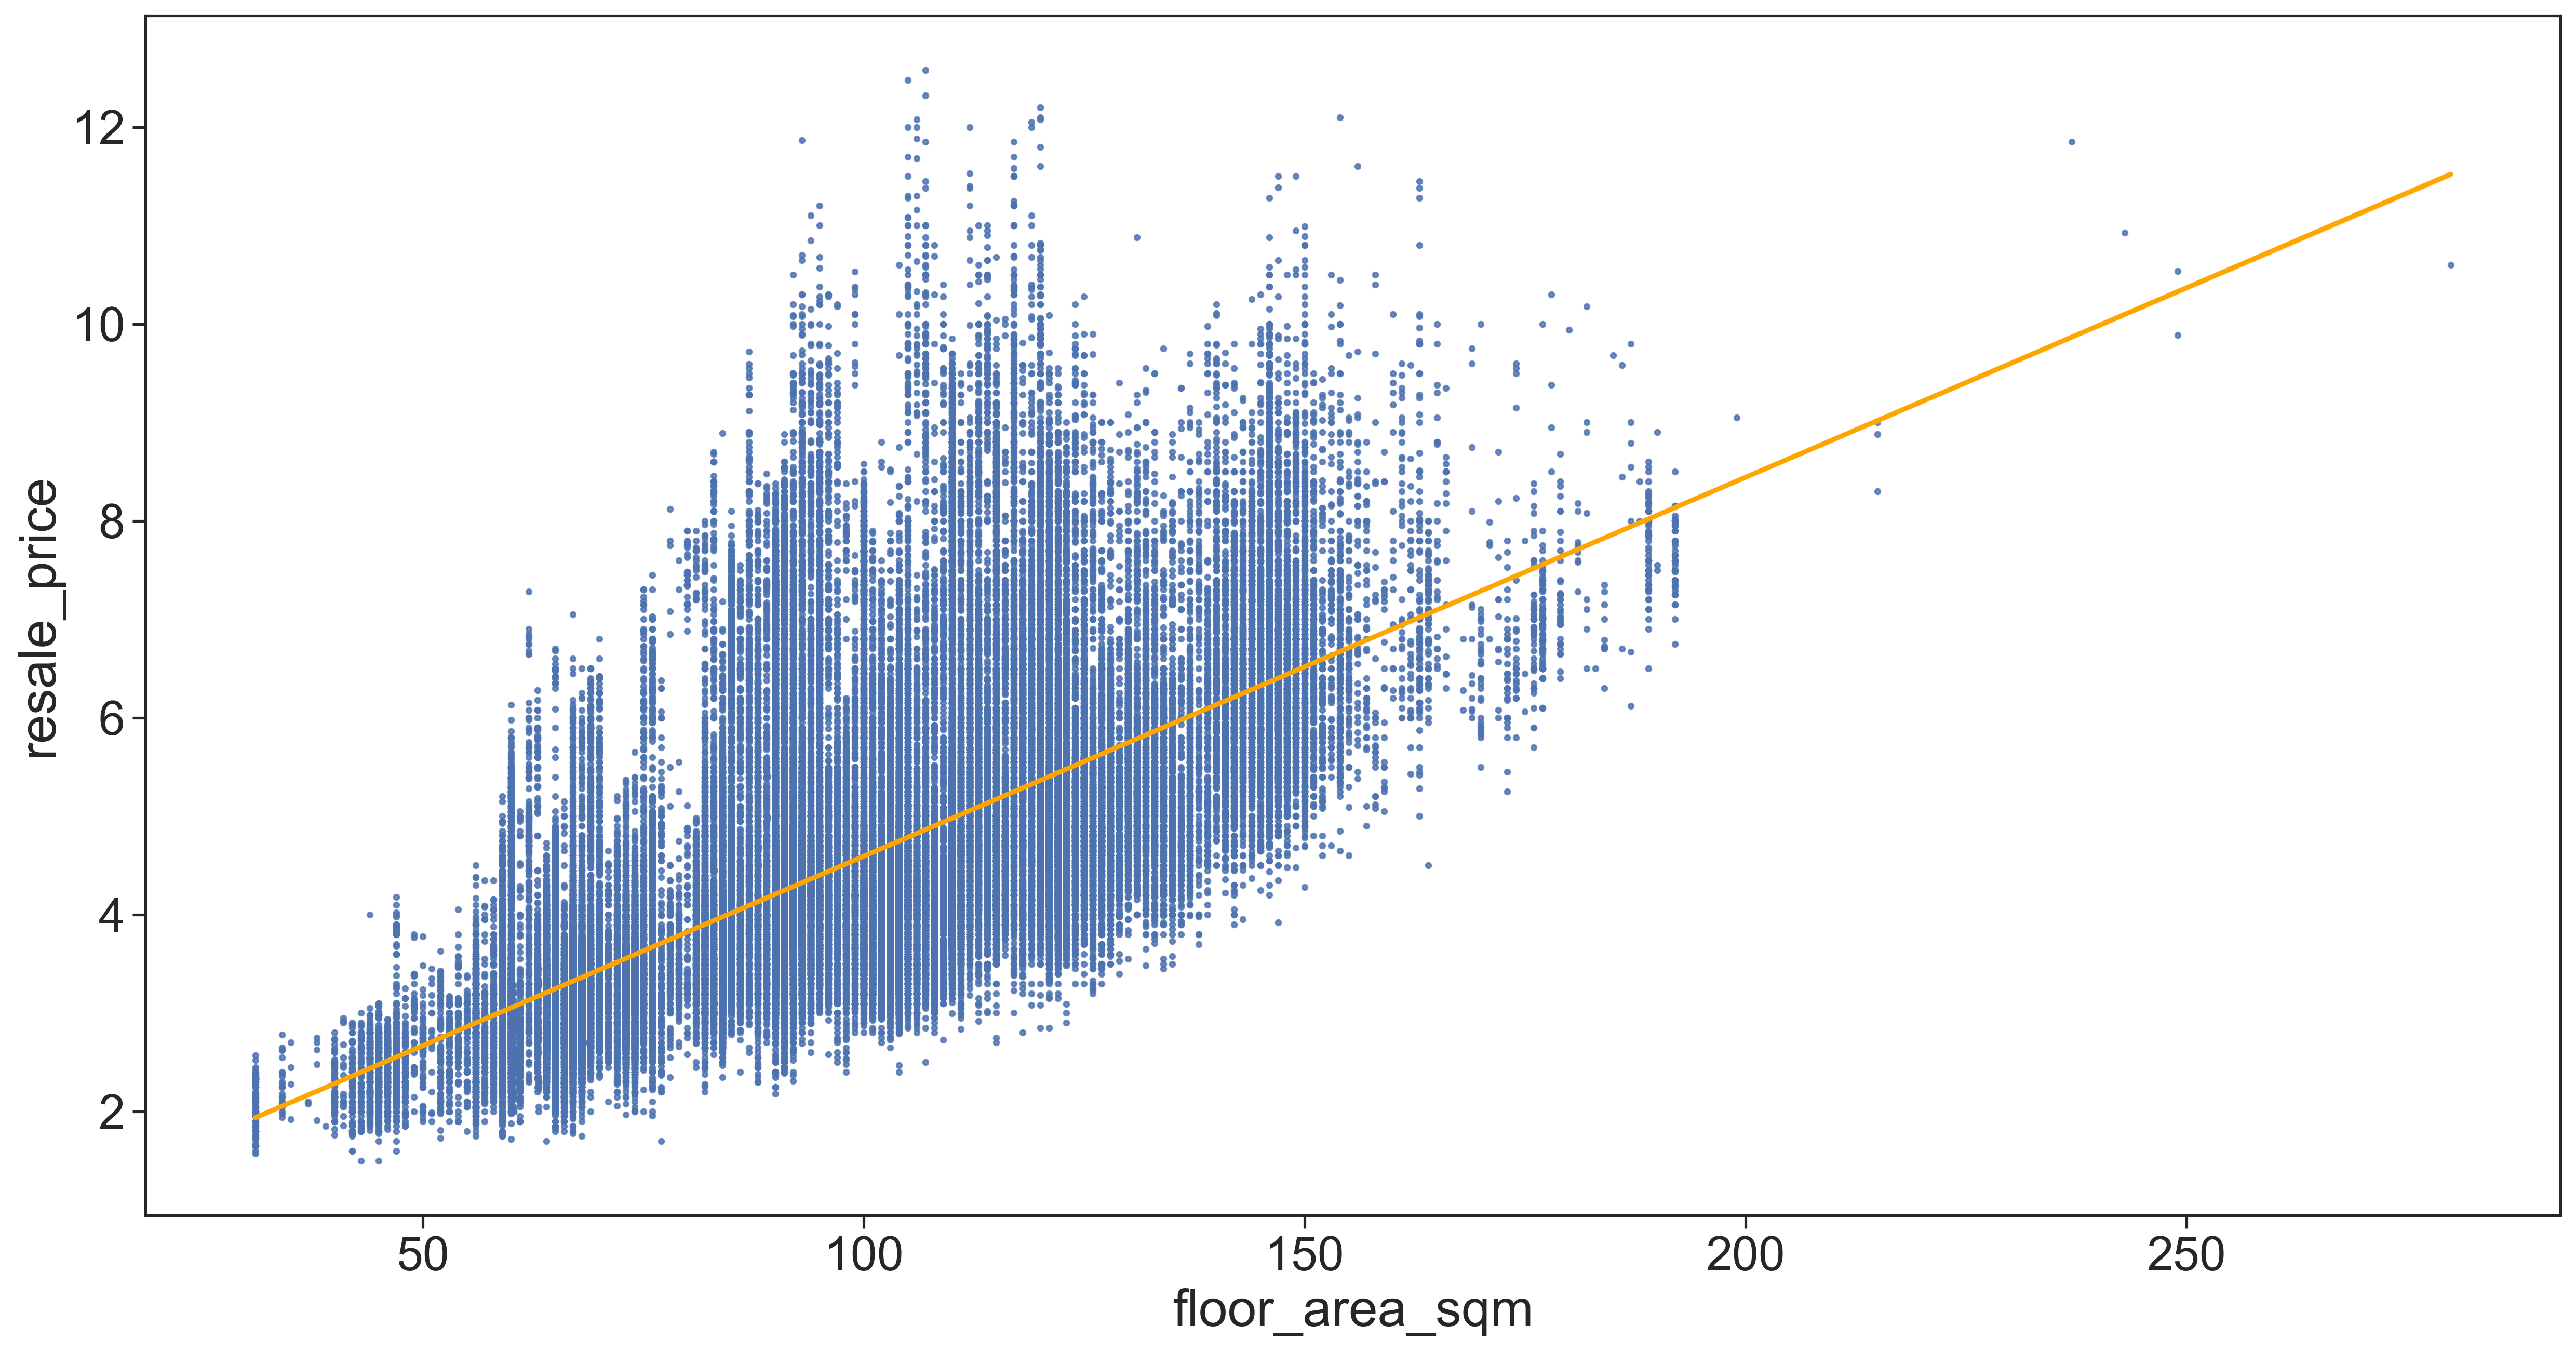

In [95]:
sns.set(font_scale=2)
sns.set_style("ticks")

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
fig.set_dpi(300)


sns.regplot(data=df, x='floor_area_sqm',y='resale_price', ax=ax, scatter_kws={'s':5}, line_kws={"color":"orange"});

From the numerical data, only the floor area was a factor. We will include that in our model.

We can see that although it is correlated, there should be other factors contributing to houses due to the variance in prices.

In [73]:
df.select_dtypes(include='object').columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'full_flat_type', 'address', 'postal', 'planning_area',
       'mrt_name', 'bus_stop_name', 'pri_sch_name', 'sec_sch_name',
       'block_type'],
      dtype='object')

For the categorical data, we will not use the following:

- `town`, `address`,`postal`,`mrt_name`: We are using `planning_area` instead. The name of the closest MRT is associated with the planning area that the MRT is in.
- `block`: In Singapore, block names are rather arbitrary are unlikely to give us any meaningful insight
- `bus_stop_name`: Practically, no one really cares about bus stop names.
- `pri_sch_name`, `sec_sch_name`: They are also related to location of which we'll use `planning_area` instead.
- `storey_range`: This was covered in the numeric analysis of correlation

In [74]:
list_of_categorical_features = ['flat_type','full_flat_type','flat_model','planning_area','block_type']

In [77]:
def categorical_boxplots(df,feature):
    
    temp = (df.loc[:,[feature,'resale_price']]
        .groupby([feature])
        .median()
        .sort_values(by='resale_price'))
    
    fig, ax = plt.subplots(figsize=(20,10))
    ax.set(title=f"Resale price against {feature}")
    sns.boxplot(y=feature, x='resale_price', data=df,order=temp.index,orient='h', color='skyblue', showfliers=False);
    return

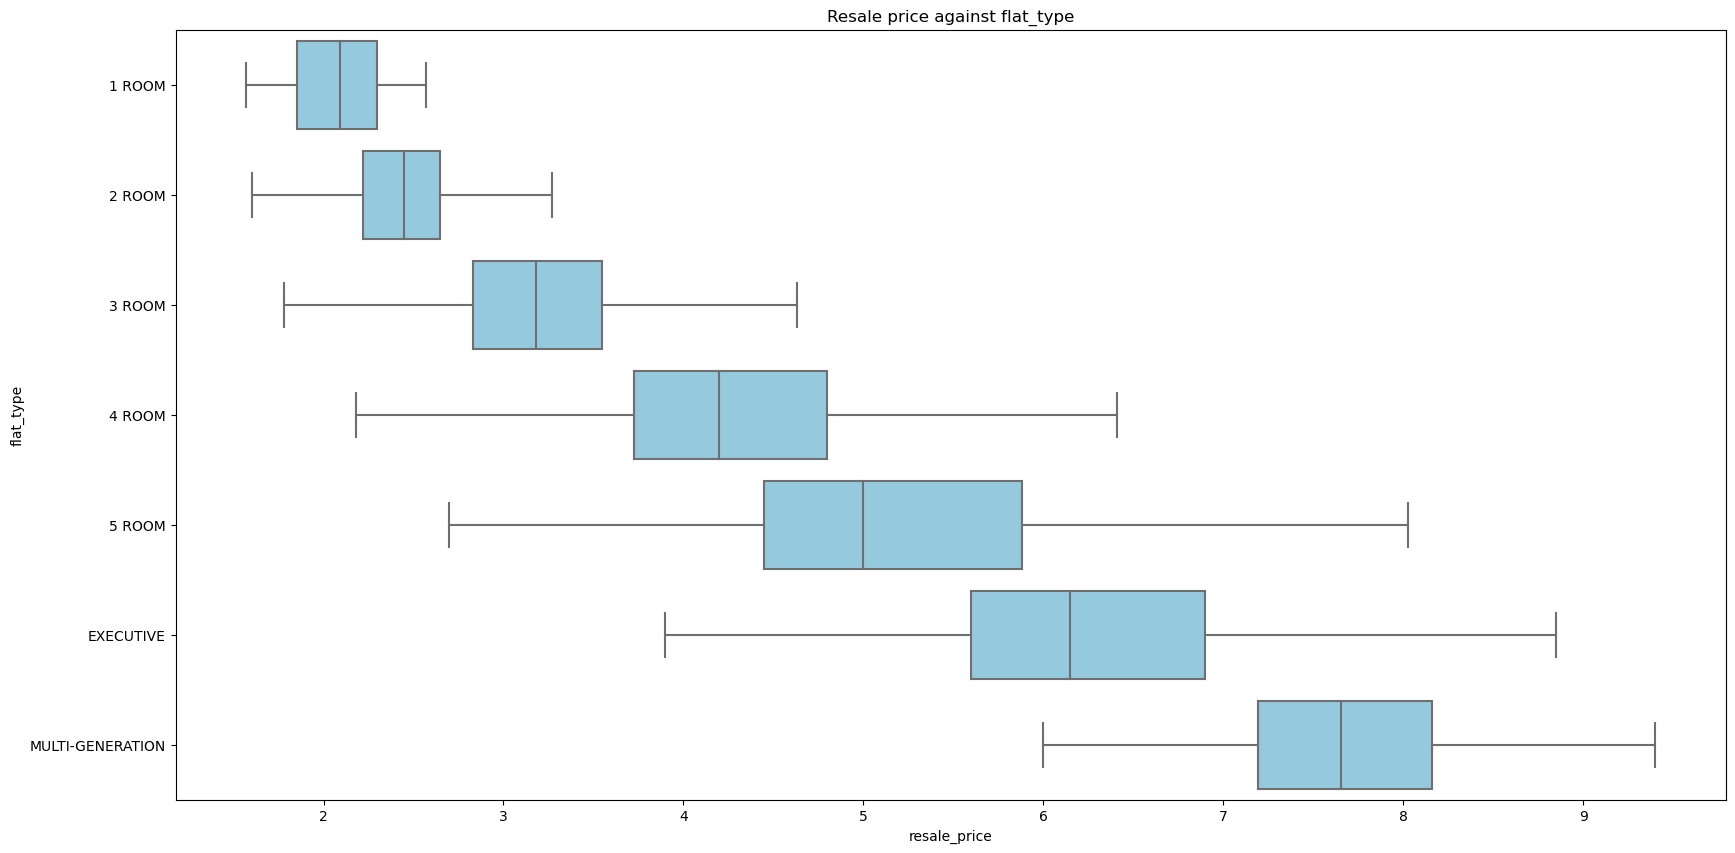

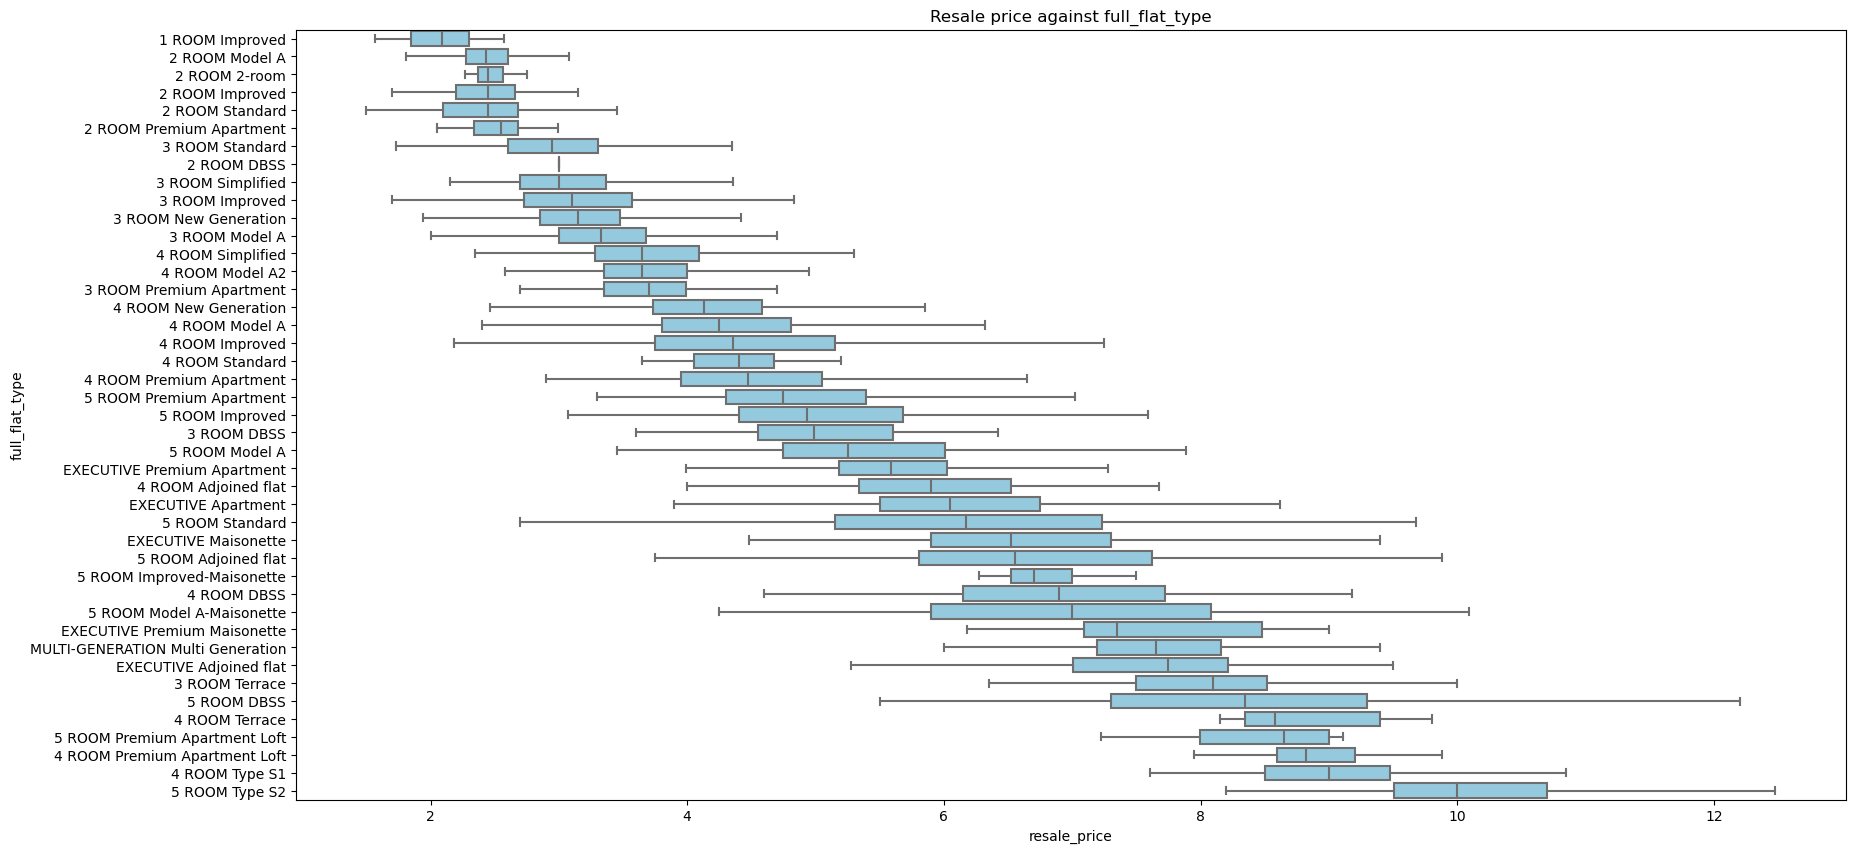

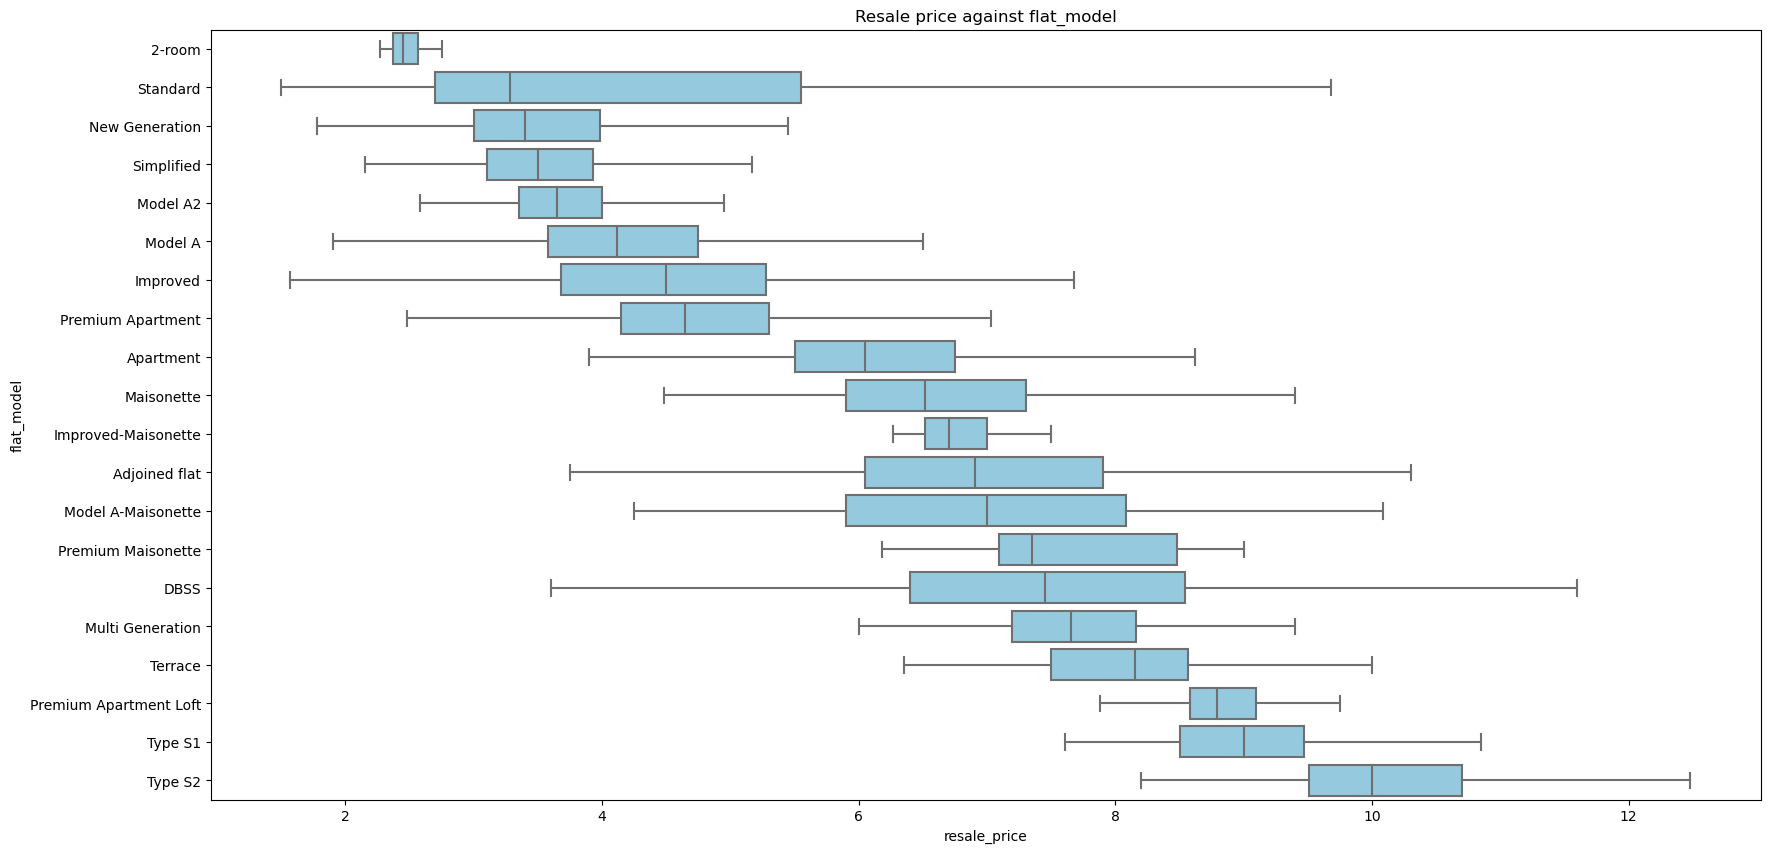

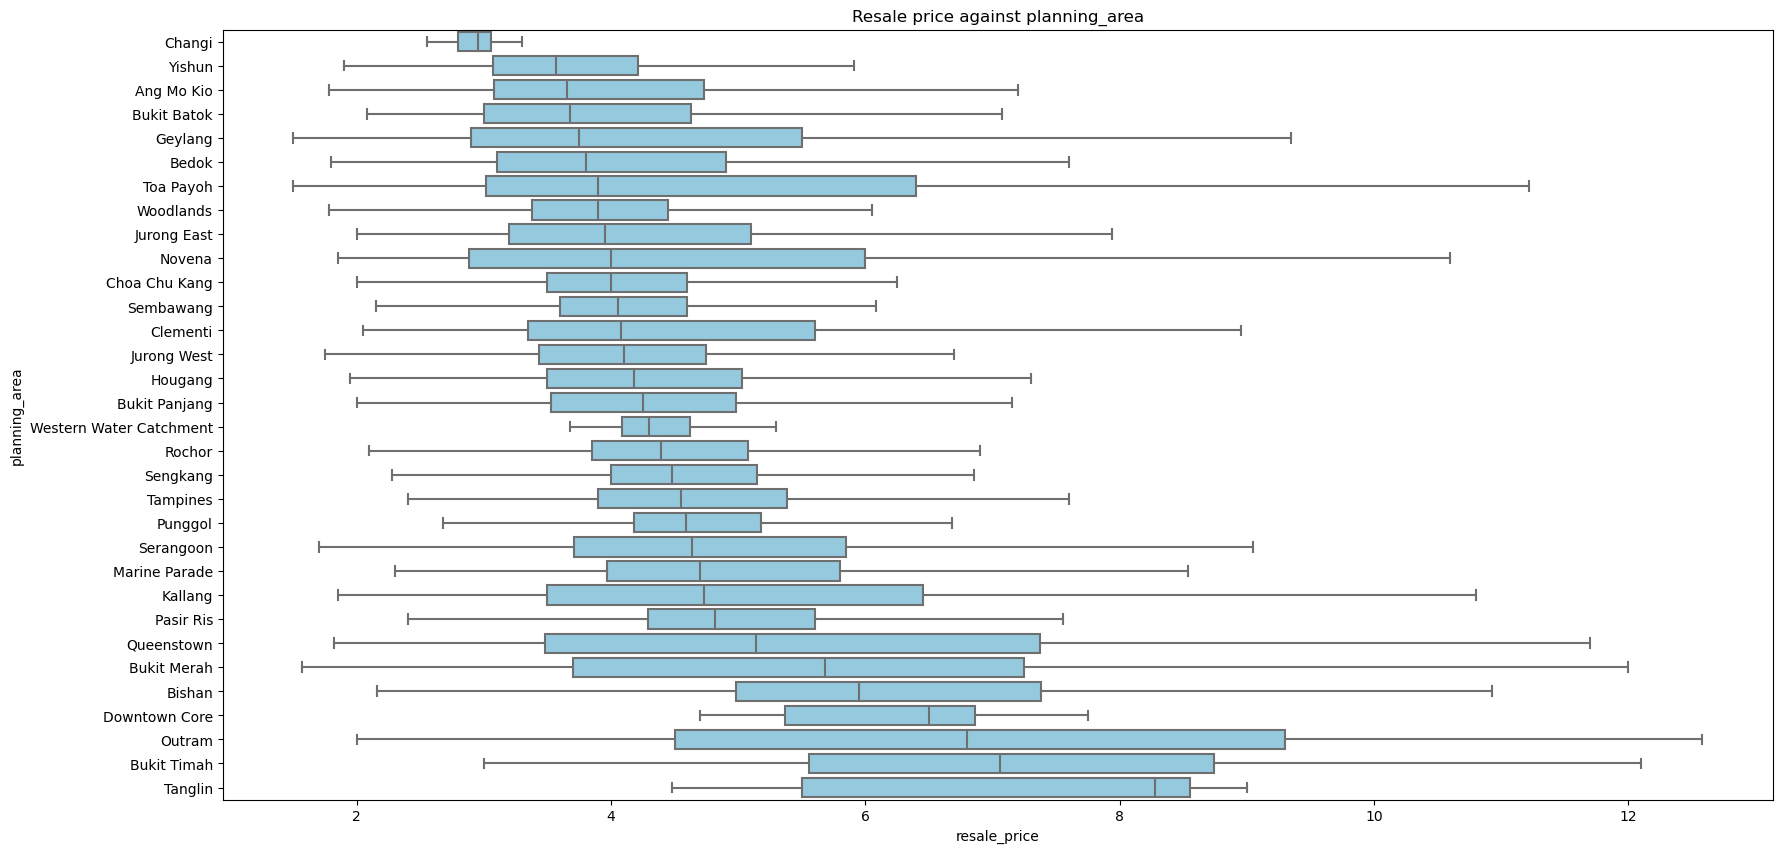

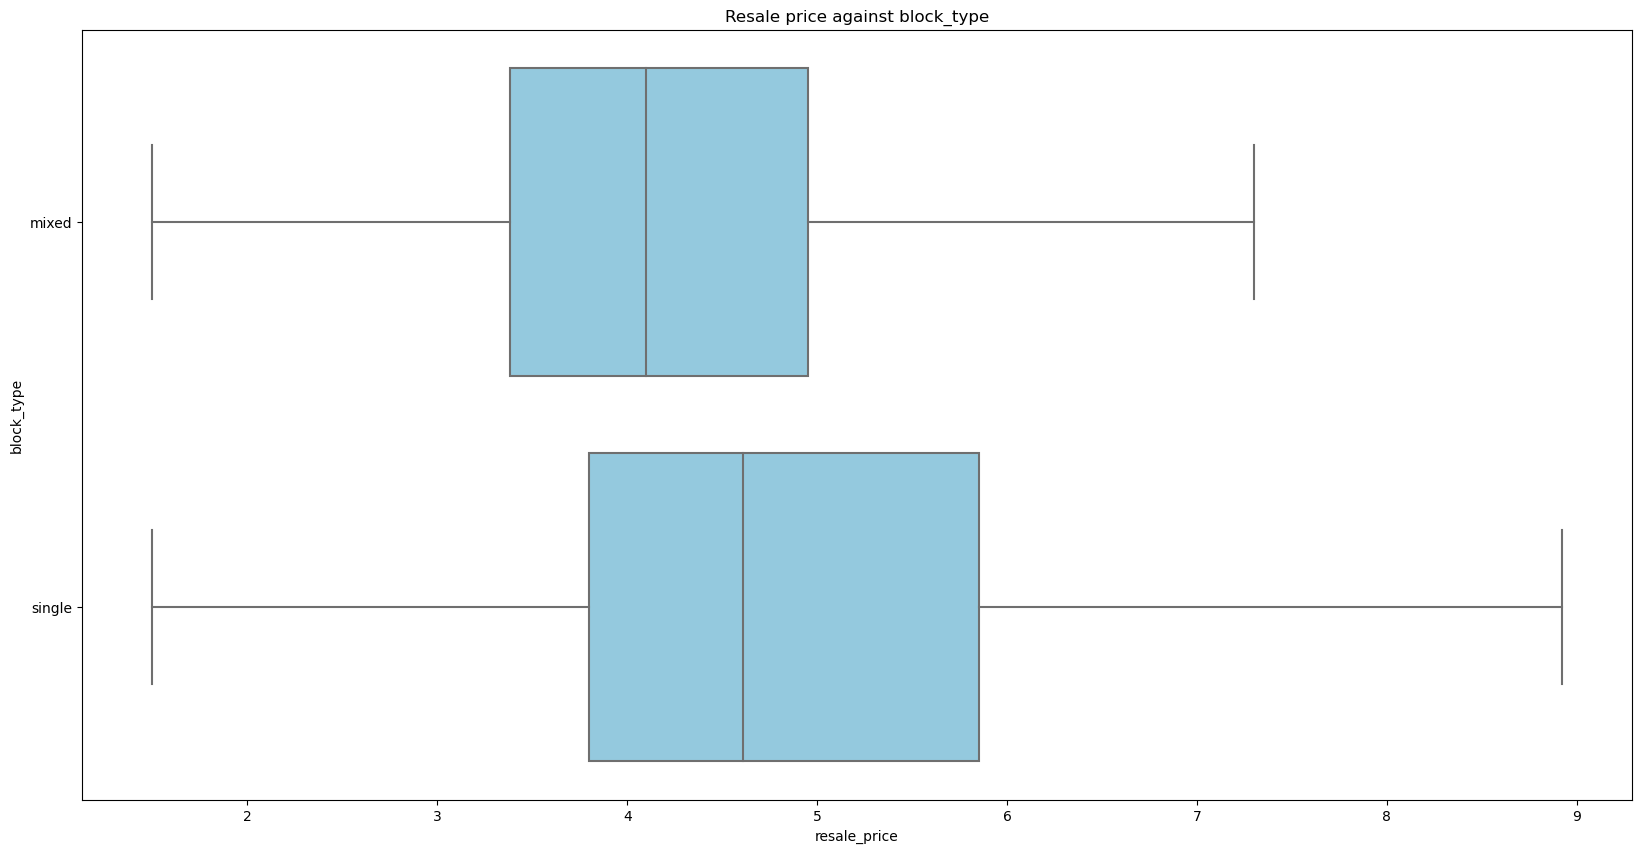

In [78]:
for feature in list_of_categorical_features:
    categorical_boxplots(df,feature)

The full flat type looks predictive of how much a flat would cost. So we will use that category feature.

The planning area also shows significant differences between different areas. We will use that as well.

We can also see that single block types are generally more expensive so we will use this feature as well.

## Features to use for our initial model

For numerical features, we only have floor area which is highly correlated with full flat type. As such, we will test two different initial models for each one.

We will also use planning area and block types.

For the block type feature, we will need to use the function on our test set:

```
df['block_type']=np.nan

def block_sorter(row):
    type_count=0
    hdb_types = ['1room_sold', '2room_sold', '3room_sold', '4room_sold', '5room_sold', 'exec_sold', 'multigen_sold', 'studio_apartment_sold']
    for hdb_type in hdb_types:
        if row[hdb_type]!=0:
            type_count+=1
    if type_count==1:
        row['block_type']='single'
    if type_count>1:
        row['block_type']='mixed'
    return row

df = df.apply(block_sorter, axis = 1)
```

We will continue in the next notebook.

In [82]:
df.to_csv('..\datasets\cleaned_data.csv')